# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

## Data represents threee marketing campaigns

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [723]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import PrecisionRecallDisplay
import time
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import log_loss, make_scorer
from sklearn.compose import make_column_transformer
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from plot_metric.functions import BinaryClassification
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler 
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.inspection import permutation_importance
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [327]:
#To always have plots with no scroll bar in Jupyter notebook

In [328]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [329]:
#To ignore Warnings

In [330]:

import warnings
warnings.filterwarnings('ignore')


In [331]:
df = pd.read_csv("C:\\Users\\ajit2\\Desktop\\Berkley Course\\From Berkley\\Module 17\\data\\bank-additional-full.csv", sep = ';')

In [332]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [333]:
#checking the shape of dataframe

In [334]:
df.shape

(41188, 21)

In [335]:
# Checking other relvant information in the  dataframe. 
# The dataframe has 21 columns of which 5 are numerical columns and the rest categorical
# No columns have null values 

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [337]:
#checking for duplicates 
# this is assuming that rows form a unique record 
# Data has 12 duplicates

In [338]:
df.duplicated().sum()

12

In [339]:
# Dropping Duplicates

In [340]:
df.drop_duplicates(inplace=True)

In [341]:
# Understanding the target variable i.e. y

In [342]:
df['y'].value_counts(normalize=True)

no     0.887337
yes    0.112663
Name: y, dtype: float64

In [343]:
# show pie plot for distribution of Target value
# THe Y category data is imbalanced with only 11.27% representing target values.

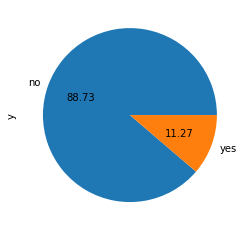

In [344]:
df['y'].value_counts().plot.pie(autopct="%.2f");

In [345]:
## Mapping 'y' to numercial values to better data manipulation 

In [346]:
Y_categories={'yes':1,'no': 0}                                        
df['y_category']=df['y'].map(Y_categories)

In [347]:
# Checking unique values in the dataframe

In [348]:
df.T.apply(lambda x: x.nunique(), axis=1)
df.apply(pd.Series.nunique)

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
y_category           2
dtype: int64

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

#### A brief summary is as follows: Due to internal competition and current financial crisis, there are
#### huge pressures for European banks to increase a financial asset. To solve this issue, one adopted strategy 
#### is offer attractive long-term deposit applications with good interest rates, in particular by using directed 
#### marketing campaigns.  Due to pressing driversfor reduction in costs and time, there is
#### a need for an improvement in efficiency the way this is done i.e. with lesser contacts  but with approximately the same number of 
#### successes (clients subscribing the deposit) . They hence will also need the features that will help client improve  their
#### efficency of markerting campaigns besides high measure of accuracy for the model from which the features
#### are ascertained

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [349]:
# columns in the dataframe

In [350]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'y_category'],
      dtype='object')

In [351]:
##Column 1-7 columns are given below

In [352]:
df.columns[:7]

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan'], dtype='object')

In [353]:
# Understanding the numerical column

In [354]:
df['age'].describe()

count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [355]:
# Slicing the age into 5 brackets to see if there is any meaningful spread of subscriber acceptance by age bracket

In [356]:
bins = [-np.inf,20,40,60,80,np.inf]
labels = ['age_less_than_20_years' ,'age_>=20_and_<40_years','age_>=40 &_<60_years', 'age_>=60_and_<80 years',\
          'age_above_100_years']
df['age_bins'] = pd.cut(df.age, bins=bins,labels=labels,  right=False, include_lowest=True)

#### Bar plot of age-bins versus term deposit subscription
#### the plot below shows that age group below 20 years and greater than 60 years have a higher mean than other age groups

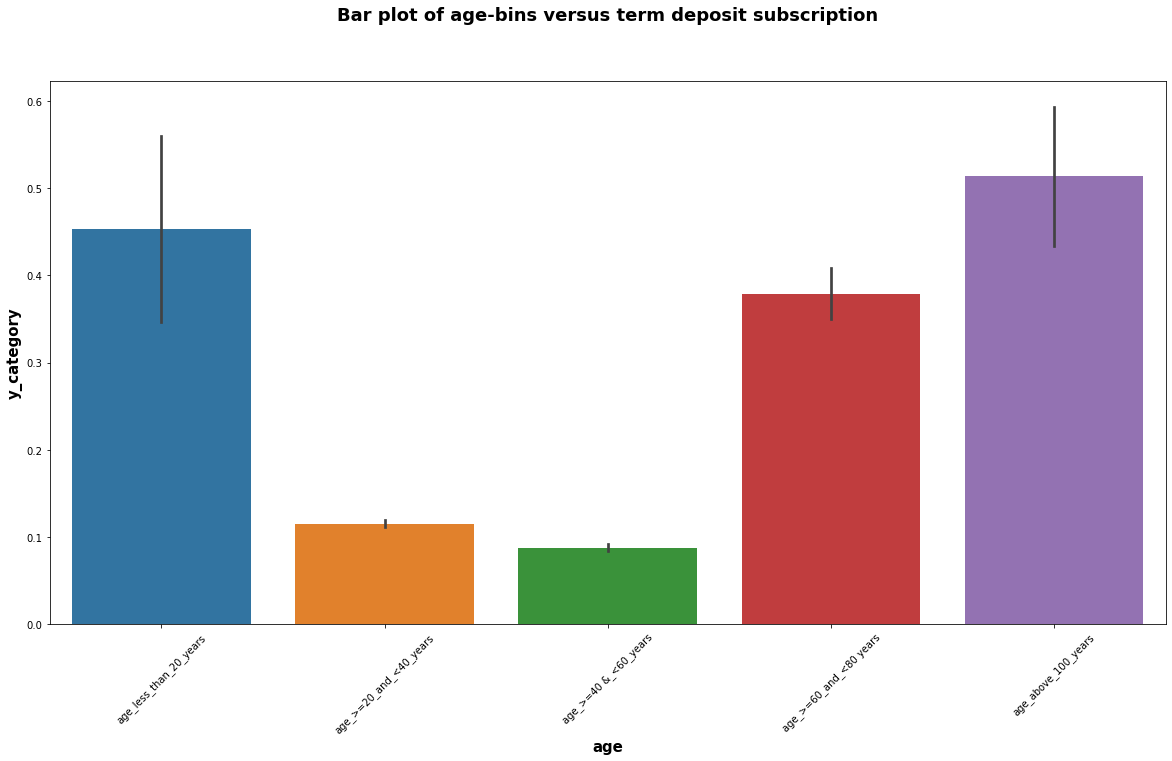

In [357]:
plt.figure(figsize=(20,10))
sns.barplot(x='age_bins',y='y_category',data=df)
plt.xticks(rotation=45)
plt.xlabel('age', fontweight='bold',fontsize=15)
plt.ylabel('y_category', fontweight='bold',fontsize=15)
plt.title("Bar plot of age-bins versus term deposit subscription",fontweight="bold",fontsize=18,y=1.1);

#### Plotting all categorical columns to see the difference in subscription

In [358]:
feature=['job', 'marital', 'education', 'default', 'housing', 'loan']

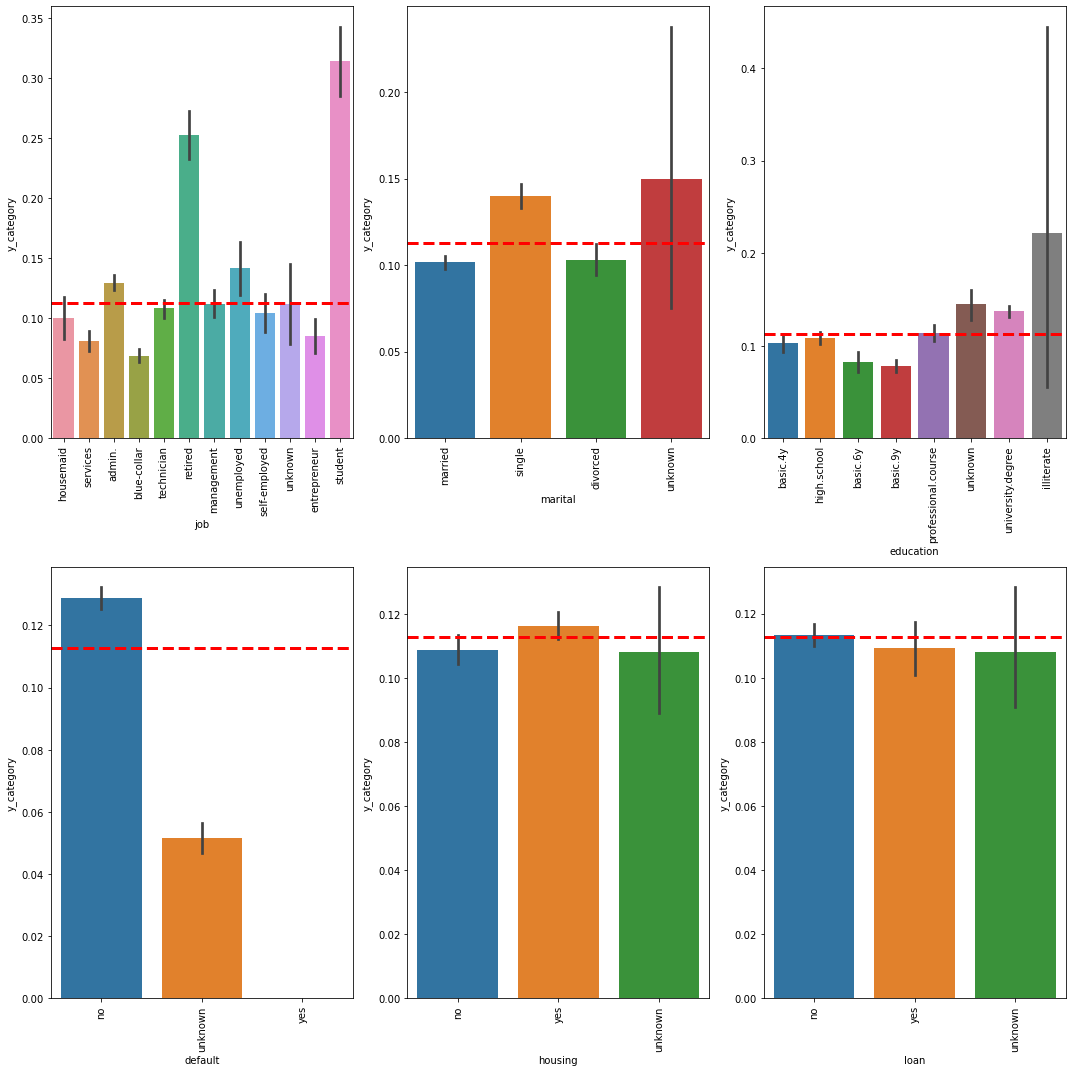

In [359]:
plt.figure(figsize=(15,15))
for i in enumerate(feature):
        plt.subplot(2,3,i[0]+1)
        #plt.ylim(7500,28000)
        fig=sns.barplot(x=i[1],y=df['y_category'],data=df[['job', 'marital', 'education', 'default', 'housing', 'loan','y_category']])
        plt.axhline(df.y_category.mean(), color='r', linestyle='dashed', linewidth=3)
        plt.xticks(rotation=90)
        plt.tight_layout(h_pad=1)
       
        
       

### Plot above shows the following categories had higher than mean subscription:
#### marital:single,unknown
#### education:unknown,university.degree_illiterate,
#### default:no
#### housing:yes
#### loan:no


### Using above to reduce the number of categories within categorical columns to reduce the "curse of dimensionality"

##### Reducing the 'job' column categories

In [360]:
#df.y_category.mean()

In [361]:
#df.groupby('job')['y_category'].mean()

In [362]:
# reducing the number of category

In [363]:
# Jobs columns


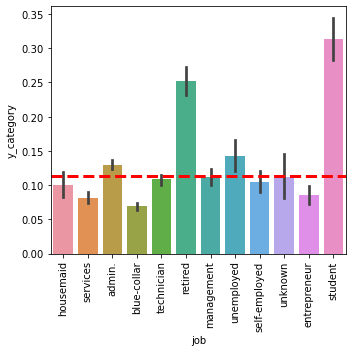

In [364]:
plt.figure(figsize=(5,5))
fig=sns.barplot(x=df['job'],y=df['y_category'],data=df)
plt.axhline(df.y_category.mean(), color='r', linestyle='dashed', linewidth=3)
plt.xticks(rotation=90)
plt.tight_layout(h_pad=1)

In [365]:
# grouping "Job" columns values listed above into two categories 
#first category grouping all values above the mean price
# second category grouping the rest together

In [366]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [367]:
job_categories={'housemaid':'job_rest',\
                       'services':'job_rest',
                      'admin.':'job_admin_retired_unemployed_student', \
                      'blue-collar':'job_rest',\
                      'technician':'job_rest',\
                      'retired':'job_admin_retired_unemployed_student',\
                      'management':'job_rest',\
                       'unemployed':'job_admin_retired_unemployed_student',
                        'self-employed':'job_rest',
                        'unknown':'job_rest',
                      'entrepreneur':'job_rest',
                      'student':'job_admin_retired_unemployed_student'  }


In [368]:
df['job_category']=df['job'].map(job_categories)

In [369]:
# checking for null values after grouping

In [370]:
df.job_category.isnull().sum()

0

In [371]:
# checking if all values appear

In [372]:
df.job_category.value_counts()

job_rest                                27150
job_admin_retired_unemployed_student    14026
Name: job_category, dtype: int64

In [373]:
# Cheking dataframe shape

In [374]:
df.shape

(41176, 24)

In [375]:
##### Reducing the 'Marital' column categories

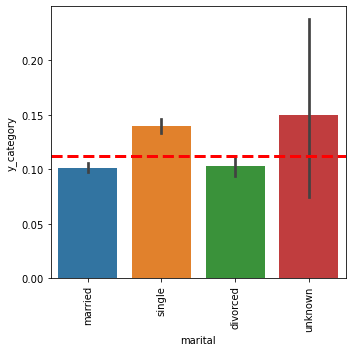

In [376]:
plt.figure(figsize=(5,5))
fig=sns.barplot(x=df['marital'],y=df['y_category'],data=df)
plt.axhline(df.y_category.mean(), color='r', linestyle='dashed', linewidth=3)
plt.xticks(rotation=90)
plt.tight_layout(h_pad=1)

In [377]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [378]:
marital_categories={'married':'marital_rest',\
                       'single':'marital_single_unknown',
                      'divorced':'marital_rest', \
                      'unknown':'marital_single_unknown'    }

In [379]:
df['marital_category']=df['marital'].map(marital_categories)

In [380]:
# checking for null values after grouping

In [381]:
df.marital_category.isnull().sum()

0

In [382]:
df.marital_category.value_counts()

marital_rest              29532
marital_single_unknown    11644
Name: marital_category, dtype: int64

In [383]:
df.shape

(41176, 25)

##### Reducing the 'education' column categories

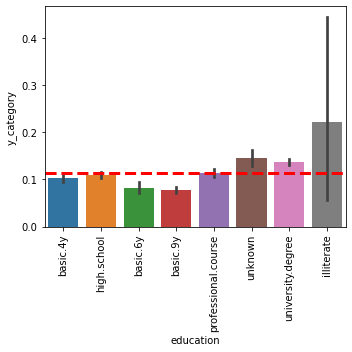

In [384]:
plt.figure(figsize=(5,5))
fig=sns.barplot(x=df['education'],y=df['y_category'],data=df)
plt.axhline(df.y_category.mean(), color='r', linestyle='dashed', linewidth=3)
plt.xticks(rotation=90)
plt.tight_layout(h_pad=1)

In [385]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [386]:
df.groupby('education')['y_category'].mean()

education
basic.4y               0.102490
basic.6y               0.082060
basic.9y               0.078246
high.school            0.108389
illiterate             0.222222
professional.course    0.113550
university.degree      0.137208
unknown                0.145087
Name: y_category, dtype: float64

In [387]:
education_categories={'basic.4y':'education_rest',\
                       'high.school':'education_rest',
                      'basic.6y':'education_rest', \
                      'basic.9y':'education_rest',  
                    'professional.course':'education_rest',
                    'unknown':'education_unknown_university.degree_illiterate',
                    'university.degree':'education_unknown_university.degree_illiterate',
                    'illiterate':'education_unknown_university.degree_illiterate'                
}

In [388]:
df['education_category']=df['education'].map(education_categories)

In [389]:
# checking for null values after grouping

In [390]:
df.education_category.isnull().sum()

0

In [391]:
df.education_category.value_counts()

education_rest                                    27264
education_unknown_university.degree_illiterate    13912
Name: education_category, dtype: int64

In [392]:
df.shape

(41176, 26)

##### Reducing the 'default column categories

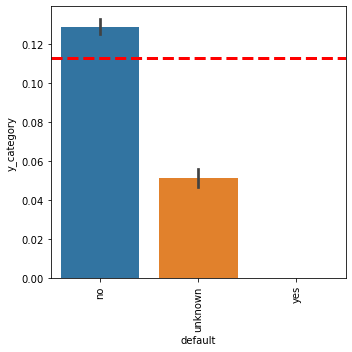

In [393]:
plt.figure(figsize=(5,5))
fig=sns.barplot(x=df['default'],y=df['y_category'],data=df)
plt.axhline(df.y_category.mean(), color='r', linestyle='dashed', linewidth=3)
plt.xticks(rotation=90)
plt.tight_layout(h_pad=1)

In [394]:
df['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [395]:
df.groupby('default')['y_category'].mean()

default
no         0.128803
unknown    0.051536
yes        0.000000
Name: y_category, dtype: float64

In [396]:
default_categories={'no':'default_no',\
                       'unknown':'default_rest',
                      'yes':'default_rest'                               
}

In [397]:
df['default_category']=df['default'].map(default_categories)

In [398]:
# checking for null values after grouping

In [399]:
df.default_category.isnull().sum()

0

In [400]:
df.default_category.value_counts()

default_no      32577
default_rest     8599
Name: default_category, dtype: int64

In [401]:
df.shape

(41176, 27)

##### Reducing the 'housing' column categories

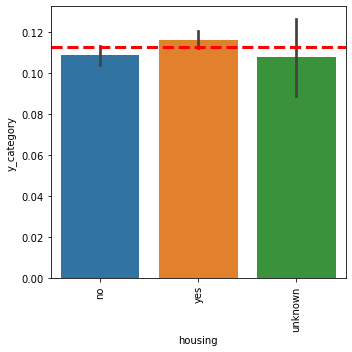

In [402]:
plt.figure(figsize=(5,5))
fig=sns.barplot(x=df['housing'],y=df['y_category'],data=df)
plt.axhline(df.y_category.mean(), color='r', linestyle='dashed', linewidth=3)
plt.xticks(rotation=90)
plt.tight_layout(h_pad=1)

In [403]:
df['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [404]:
df.groupby('housing')['y_category'].mean()

housing
no         0.108783
unknown    0.108081
yes        0.116221
Name: y_category, dtype: float64

In [405]:
housing_categories={'yes':'housing_yes',\
                       'no':'housing_rest',
                      'unknown':'housing_rest'                               
}

In [406]:
df['housing_category']=df['housing'].map(housing_categories)

In [407]:
# checking for null values after grouping

In [408]:
df.housing_category.isnull().sum()

0

In [409]:
df.housing_category.value_counts()

housing_yes     21571
housing_rest    19605
Name: housing_category, dtype: int64

In [410]:
df.shape

(41176, 28)

##### Reducing the 'loan' column categories

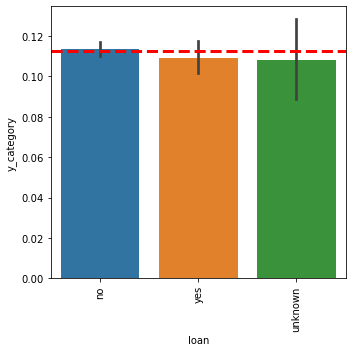

In [411]:
plt.figure(figsize=(5,5))
fig=sns.barplot(x=df['loan'],y=df['y_category'],data=df)
plt.axhline(df.y_category.mean(), color='r', linestyle='dashed', linewidth=3)
plt.xticks(rotation=90)
plt.tight_layout(h_pad=1)

In [412]:
df['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [413]:
df.groupby('loan')['y_category'].mean()

loan
no         0.113413
unknown    0.108081
yes        0.109315
Name: y_category, dtype: float64

In [414]:
loan_categories={'no':'loan_no',\
                       'unknown':'loan_rest',
                      'yes':'loan_rest'                               
}

In [415]:
df['loan_category']=df['loan'].map(loan_categories)

In [416]:
# checking for null values after grouping

In [417]:
df.loan_category.isnull().sum()

0

In [418]:
df.loan_category.value_counts()

loan_no      33938
loan_rest     7238
Name: loan_category, dtype: int64

In [419]:
# Checking columns shape of data frame

In [420]:
df.shape

(41176, 29)

In [421]:
# Checking column names of data frame

In [422]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'y_category',
       'age_bins', 'job_category', 'marital_category', 'education_category',
       'default_category', 'housing_category', 'loan_category'],
      dtype='object')

#### Creating a New dataframe with just the first 7 columnns that were grouped

In [423]:
df1=df[['age','job_category','marital_category','education_category','default_category','housing_category',\
       'loan_category','y_category']]

In [424]:
# preserving a copy for use later if needed
dfa=df1.copy(deep=True)

In [425]:
df1.columns

Index(['age', 'job_category', 'marital_category', 'education_category',
       'default_category', 'housing_category', 'loan_category', 'y_category'],
      dtype='object')

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [426]:
X2 = df1.drop('y_category',axis=1)
y2 = df1['y_category']

In [427]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=101,stratify=y2)

In [428]:
# Cheking the list of columns

In [429]:
X_train.columns

Index(['age', 'job_category', 'marital_category', 'education_category',
       'default_category', 'housing_category', 'loan_category'],
      dtype='object')

In [430]:
# Preprocessor for Naive Bayes-using min max scaler

In [431]:
categorical_features = ['job_category', 'marital_category', 'education_category',
       'default_category', 'housing_category', 'loan_category']
numerical_features = ['age']

numeric_transformer = Pipeline(
    steps=[
        ("scaler", MinMaxScaler())]
)

categorical_transformer = OneHotEncoder(drop="if_binary")


preprocessor_minmax = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ])

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [432]:
# Using Naive bayes (NB) as a Model to establish baseline for the models to beat - Creating a pipeline


In [433]:
Baseline_model= Pipeline([("preprocessor", preprocessor_minmax), ('Baseline',MultinomialNB())])

In [434]:
# Train Time for NM Model

In [435]:
Baseline_model_start = time.time()
Baseline_model.fit(X_train, y_train)
Baseline_model_end = time.time()
Baseline_model_train_time=Baseline_model_end-Baseline_model_start
Baseline_model_train_time

0.05585074424743652

### Accuracy metric used: 
#### 1)As the data was imbalanced , area under the roc_curve was used as a metric for comparing the different models. High AUC for ROC #### curve implies both high TPR and low FPR which is what is need with the ##imbalanced classification case
#### 2) All models were checking with probabilites as a measure as it gives the best AUC possible

In [436]:
# AUC Train accuracy for NB Model

In [437]:
Baseline_model_train_accuracy=roc_auc_score(y_train,Baseline_model.predict_proba(X_train)[:, 1])
Baseline_model_train_accuracy

0.6270481719898515

In [438]:
# AUC Test accuracy for NB Model

In [439]:
Baseline_model_test_accuracy=roc_auc_score(y_test,Baseline_model.predict_proba(X_test)[:, 1])
Baseline_model_test_accuracy

0.622309819453926

In [440]:
# Accuracy Plot of NB model

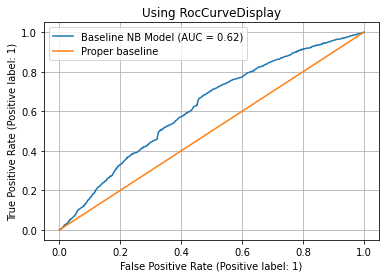

In [441]:
fig, ax = plt.subplots()
plot_roc_curve(Baseline_model, X_test, y_test,ax = ax, name = 'Baseline NB Model')
plt.grid()
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'Proper baseline');
plt.title('Using RocCurveDisplay')
plt.legend();

In [442]:
## Classification report showing all major metrics

In [443]:
print(classification_report(y_test,Baseline_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10961
           1       0.00      0.00      0.00      1392

    accuracy                           0.89     12353
   macro avg       0.44      0.50      0.47     12353
weighted avg       0.79      0.89      0.83     12353



### Problem 8: A Simple Model - use this one

Use Logistic Regression to build a basic model on your data.  

In [444]:
# Preprocessor for logistic Regression (using standard scaler)

In [445]:
categorical_features = ['job_category', 'marital_category', 'education_category',
       'default_category', 'housing_category', 'loan_category']
numerical_features = ['age']

numeric_transformer = Pipeline(
    steps=[
      ("scaler", StandardScaler())]
)

categorical_transformer = OneHotEncoder(drop="if_binary")



preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ])

In [446]:
# Creating a Pipeline

In [447]:
Log_default= Pipeline([("preprocessor", preprocessor), ('Log',LogisticRegression())])

In [448]:
# fitting the model and getting the train time

In [449]:
Log_default_start= time.time()
Log_default.fit(X_train,y_train)
Log_default_end= time.time()
Log_default_train_time=Log_default_end-Log_default_start
Log_default_train_time


0.09244585037231445

### Problem 9: Score the Model

What is the accuracy of your model?

In [450]:
# AUC Train accuracy for Logistic Regression model-using probabilites

In [451]:
Log_default_train_accuracy=roc_auc_score(y_train,Log_default.predict_proba(X_train)[:, 1])

Log_default_train_accuracy

0.6399127935904647

In [452]:
# AUC Test accuracy for Logistic Regression model-using probabilites

In [453]:
Log_default_test_accuracy=roc_auc_score(y_test,Log_default.predict_proba(X_test)[:, 1])

Log_default_test_accuracy

0.640396148518205

In [454]:
#AUC test accuracy for logistic Regression model - using predictions

In [455]:
y_pred_Log_default = Log_default.predict(X_test)
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_Log_default)
metrics.auc(fp_rate, tp_rate)

0.5

In [456]:
# Plots

In [457]:
# PLot -1: ROC curve-AUC to compare the models performance against baseline NB Model and absolute baseline

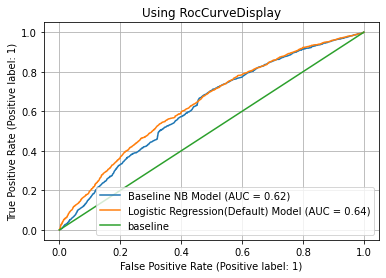

In [458]:
fig, ax = plt.subplots()
plot_roc_curve(Baseline_model, X_test, y_test,ax = ax, name = 'Baseline NB Model')
plot_roc_curve(Log_default, X_test, y_test,ax = ax, name = 'Logistic Regression(Default) Model')
plt.grid()
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
plt.title('Using RocCurveDisplay')
plt.legend();


In [459]:
#  PLot -2 : AUC using SKLPT to show the macro and micro AUC for different classes

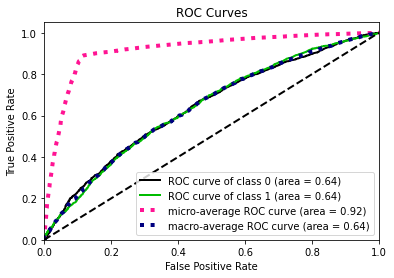

In [460]:
skplt.metrics.plot_roc_curve(y_test, Log_default.predict_proba(X_test))
plt.show()

In [461]:
## Plot-3 : Confusion Matrix- for test data

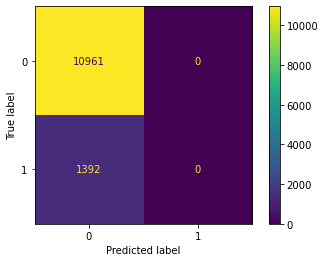

In [462]:
plot_confusion_matrix(Log_default,X_test,y_test)

In [463]:
## Plot-4:Classification report showing all major metrics

In [464]:
print(classification_report(y_test,Log_default.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10961
           1       0.00      0.00      0.00      1392

    accuracy                           0.89     12353
   macro avg       0.44      0.50      0.47     12353
weighted avg       0.79      0.89      0.83     12353



In [465]:
## Plot 5: Lift curve showing the deciles to be used by marketing to decide how many contacts to and compare with other models

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

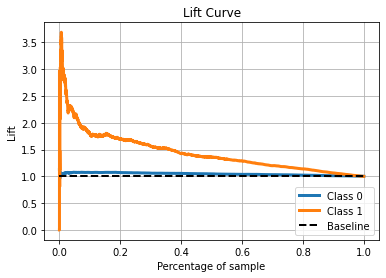

In [466]:
skplt.metrics.plot_lift_curve(y_test,Log_default.predict_proba(X_test))

In [467]:
## Getting coefficeints outs to understand feature importance

In [468]:
feature_names = Log_default[:-1].get_feature_names_out()

coefs = pd.DataFrame(
   Log_default['Log'].coef_.T,
   columns=["Coefficients"],
    index=feature_names,
)

coefs

,Coefficients
num__age,0.205595
cat__job_category_job_rest,-0.426342
cat__marital_category_marital_single_unknown,0.432122
cat__education_category_education_unknown_university.degree_illiterate,0.186576
cat__default_category_default_rest,-0.968328
cat__housing_category_housing_yes,0.090953
cat__loan_category_loan_rest,-0.055392


In [469]:
# plotting the coefficients with a horizontal bar plot

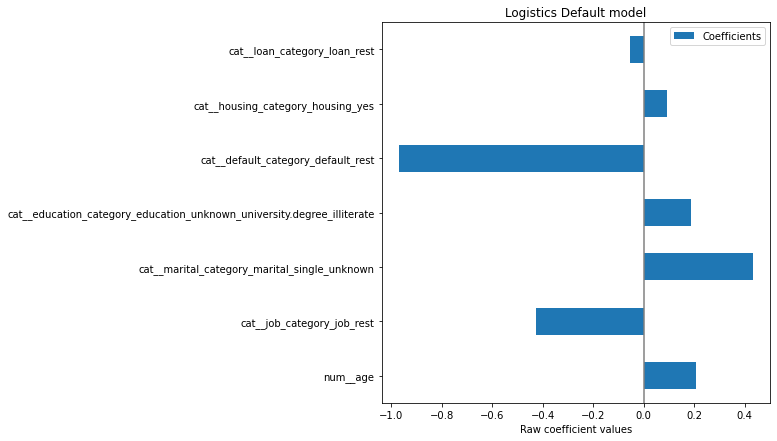

In [470]:
coefs.plot.barh(figsize=(9, 7))
plt.title("Logistics Default model")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

####  Checking the variability of the coefficients as  If coefficients vary significantly when changing the input dataset 
#### their robustness is not guaranteed, and they should probably be interpreted with caution.

In [471]:
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
cv_model_log = cross_validate(
    Log_default,
    X_train,
    y_train,
    cv=cv,
    return_estimator=True,
    n_jobs=2,
)
coefs = pd.DataFrame(
    [est[-1].coef_[0] for est in cv_model_log["estimator"]], columns=Log_default[:-1].get_feature_names_out()
)

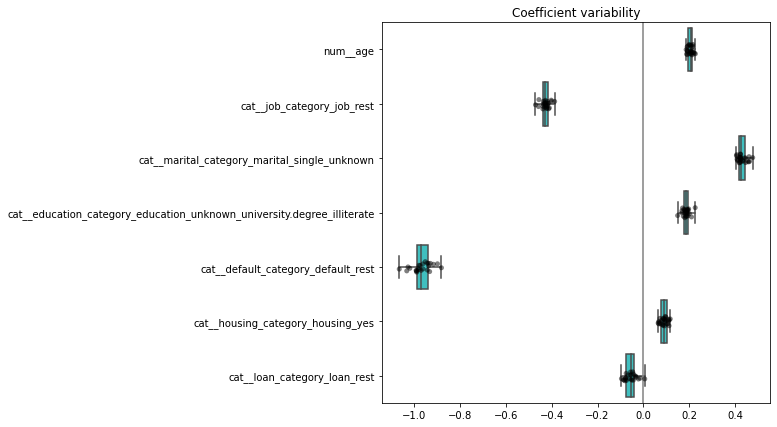

In [472]:
plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", color="k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5, whis=10)
plt.axvline(x=0, color=".5")
plt.title("Coefficient variability")
plt.subplots_adjust(left=0.3)

### Above results show that defualt is the most important feature but it has high variability
####  Next important category is job - it is not as varable as default though

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

## Using KNN algorithm with its Default Parameters

In [473]:
# Creating a Pipeline for KNN

In [474]:
KNN_default= Pipeline([("preprocessor", preprocessor), ('KNN',KNeighborsClassifier())])

In [475]:
# fitting the KNN model and getting the train time

In [476]:
KNN_default_start= time.time()
KNN_default.fit(X_train,y_train)
KNN_default_end= time.time()
KNN_default_train_time=KNN_default_end-KNN_default_start
KNN_default_train_time


0.1118311882019043

## Model Score



In [477]:
# AUC Train accuracy for KNN model -using probabilites

In [478]:
KNN_default_train_accuracy=roc_auc_score(y_train,KNN_default.predict_proba(X_train)[:, 1])

KNN_default_train_accuracy

0.6614544895463766

In [479]:
# AUC Test accuracy for KNN model -using probabilites

In [480]:
KNN_default_test_accuracy=roc_auc_score(y_test,KNN_default.predict_proba(X_test)[:, 1])

KNN_default_test_accuracy

0.5731465176430124

In [481]:
# AUC test accuracy for KNN model using predictions

In [482]:
y_pred_KNN_default = KNN_default.predict(X_test)
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_KNN_default)
metrics.auc(fp_rate, tp_rate)

0.5221038056033565

In [483]:
# Plots

In [484]:
# PLot -1: ROC curve-AUC to compare the models performance against baseline NB Model and absolute baseline

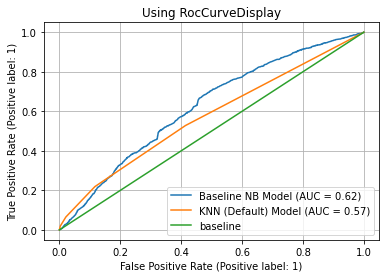

In [485]:
fig, ax = plt.subplots()
plot_roc_curve(Baseline_model, X_test, y_test,ax = ax, name = 'Baseline NB Model')
plot_roc_curve(KNN_default, X_test, y_test,ax = ax, name = 'KNN (Default) Model')
plt.grid()
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
plt.title('Using RocCurveDisplay')
plt.legend();


In [486]:
# PLot -2 : AUC using SKLPT to show the macro and micro AUC for different classes 

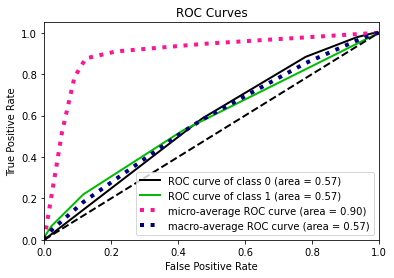

In [487]:
skplt.metrics.plot_roc_curve(y_test, KNN_default.predict_proba(X_test))
plt.show()

In [488]:
## Plot-3 : Confusion Matrix- for test data

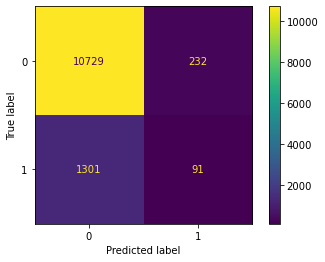

In [489]:
 plot_confusion_matrix(KNN_default,X_test,y_test);

In [490]:
## Plot-4:Classification report showing all major metrics (f1,precision,recall, accuracy)

In [491]:
print(classification_report(y_test,KNN_default.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     10961
           1       0.28      0.07      0.11      1392

    accuracy                           0.88     12353
   macro avg       0.59      0.52      0.52     12353
weighted avg       0.82      0.88      0.84     12353



In [492]:
## Plot 5: Lift curve showing the deciles to be used by marketing to decide how many contacts to and compare with other models

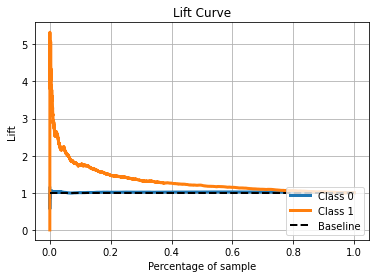

In [493]:
skplt.metrics.plot_lift_curve(y_test,KNN_default.predict_proba(X_test));

## Using Decision Tree algorithm with its Default Parameters

In [494]:
# As decsion tree numerical inputs dont require scaling - modifying the previous column transformer

In [495]:
categorical_features = ['job_category', 'marital_category', 'education_category',
       'default_category', 'housing_category', 'loan_category']
numerical_features = ['age']

numeric_transformer = Pipeline(
    steps=[
    #("imputer", SimpleImputer(strategy="median")),
    #("scaler", StandardScaler())
    ]
)

categorical_transformer = OneHotEncoder(drop="if_binary")



preprocessor_DT = ColumnTransformer(
    transformers=[
        #("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ])

In [496]:
# Creating a pipeline

In [497]:
DT_default= Pipeline([("preprocessor", preprocessor_DT), ('DT',DecisionTreeClassifier())])

In [498]:
# Fitting pipeline and getting the train time

In [499]:
DT_default_start= time.time()
DT_default.fit(X_train,y_train)
DT_default_end= time.time()
DT_default_train_time=DT_default_end-DT_default_start
DT_default_train_time


0.05702972412109375

## Model Score



In [500]:
# AUC train accuracy for DT model -using probabilites

In [501]:
DT_default_train_accuracy=roc_auc_score(y_train,DT_default.predict_proba(X_train)[:, 1])

DT_default_train_accuracy

0.636230344335557

In [502]:
# AUC test accuracy for DT model -using probabilites

In [503]:
DT_default_test_accuracy=roc_auc_score(y_test,DT_default.predict_proba(X_test)[:, 1])

DT_default_test_accuracy

0.6305602373409591

In [504]:
# AUC test accuracy for DT model - using predictions

In [505]:
y_pred_DT_default = DT_default.predict(X_test)
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_DT_default)
metrics.auc(fp_rate, tp_rate)

0.5

In [506]:
# Plots

In [507]:
# PLot -1: ROC curve-AUC to compare the models performance against baseline NB Model and absolute baseline

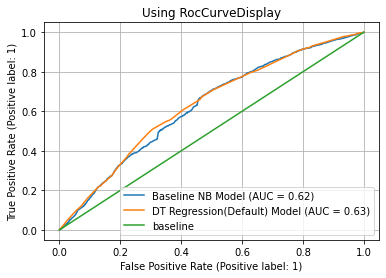

In [508]:
fig, ax = plt.subplots()
plot_roc_curve(Baseline_model, X_test, y_test,ax = ax, name = 'Baseline NB Model')
plot_roc_curve(DT_default, X_test, y_test,ax = ax, name = 'DT Regression(Default) Model')
plt.grid()
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
plt.title('Using RocCurveDisplay')
plt.legend();


In [509]:
#PLot -2 : AUC using SKLPT to show the macro and micro AUC for different classes

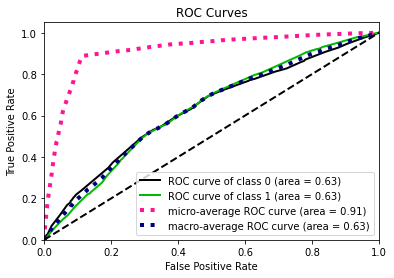

In [510]:
skplt.metrics.plot_roc_curve(y_test, DT_default.predict_proba(X_test))
plt.show()

In [511]:
## Plot-3 : Confusion Matrix- for test data

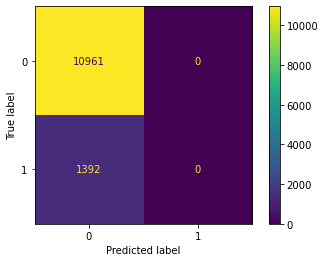

In [512]:
 plot_confusion_matrix(DT_default,X_test,y_test);

In [513]:
## Plot-4:Classification report showing all major metrics

In [514]:
print(classification_report(y_test,DT_default.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10961
           1       0.00      0.00      0.00      1392

    accuracy                           0.89     12353
   macro avg       0.44      0.50      0.47     12353
weighted avg       0.79      0.89      0.83     12353



In [515]:
## Plot 5: Lift curve showing the deciles to be used by marketing to decide how many contacts to and compare with other models

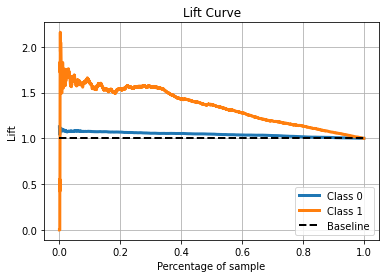

In [516]:
skplt.metrics.plot_lift_curve(y_test,DT_default.predict_proba(X_test));

##  UsingSupport Vectore Machines (SVM) algorithm with its Default Parameters

In [517]:
# creating a Support vector machine (SVM) pipelne

In [518]:
SVM_default= Pipeline(
    steps=[("preprocessor", preprocessor), ('SVC',SVC(probability=True))]
)

In [519]:
# Fitting the SVM pipleline and getting the training time

In [520]:
SVM_default_start= time.time()
SVM_default.fit(X_train,y_train)
SVM_default_end= time.time()
SVM_default_train_time=SVM_default_end-SVM_default_start
SVM_default_train_time


125.2636969089508

### Problem 9: Score the Model

What is the accuracy of your model?

In [521]:
# AUC train accuracy for SVM Model-using probabilites

In [522]:
SVM_default_train_accuracy=roc_auc_score(y_train,SVM_default.predict_proba(X_train)[:, 1])

SVM_default_train_accuracy

0.5611246116455612

In [523]:
# AUC test accuracy for SVM Model-using probabilites

In [524]:
SVM_default_test_accuracy=roc_auc_score(y_test,SVM_default.predict_proba(X_test)[:, 1])

SVM_default_test_accuracy

0.5431493922548807

In [525]:
# AUC test accuracy for SVM Mode-using predictions

In [526]:
y_pred_SVM_default = SVM_default.predict(X_test)
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_SVM_default)
metrics.auc(fp_rate, tp_rate)

0.5014766630802836

In [527]:
# PLot -1: ROC curve-AUC to compare the models performance against baseline NB Model and absolute baseline

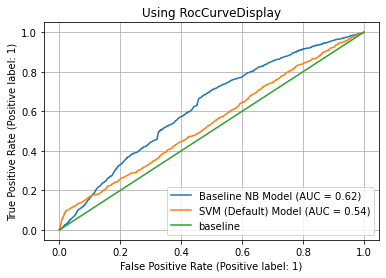

In [528]:
fig, ax = plt.subplots()
plot_roc_curve(Baseline_model, X_test, y_test,ax = ax, name = 'Baseline NB Model')
plot_roc_curve(SVM_default, X_test, y_test,ax = ax, name = 'SVM (Default) Model')
plt.grid()
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
plt.title('Using RocCurveDisplay')
plt.legend();

In [529]:
# PLot -2 : AUC using SKLPT to show the macro and micro AUC for different classes 

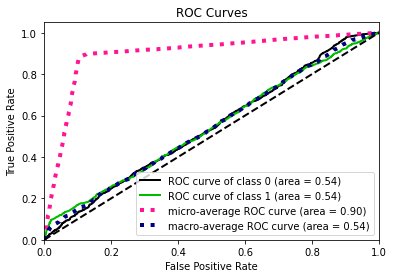

In [530]:
skplt.metrics.plot_roc_curve(y_test, SVM_default.predict_proba(X_test))
plt.show()

In [531]:
## Plot -3 Confusion Matrix- Test

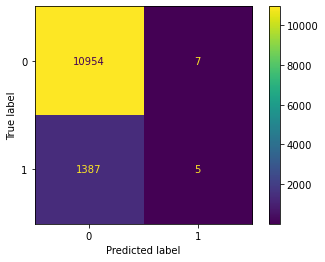

In [532]:
 plot_confusion_matrix(SVM_default,X_test,y_test);

In [533]:
## Plot-4:Classification report showing all major metrics

In [534]:
print(classification_report(y_test,SVM_default.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10961
           1       0.42      0.00      0.01      1392

    accuracy                           0.89     12353
   macro avg       0.65      0.50      0.47     12353
weighted avg       0.83      0.89      0.84     12353



In [535]:
## Plot 5: Lift curve showing the deciles to be used by marketing to decide how many contacts to and compare with other models

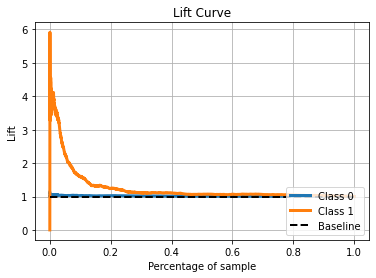

In [536]:
skplt.metrics.plot_lift_curve(y_test,SVM_default.predict_proba(X_test));


## Summary of results for Models using default parameters

In [537]:
res_dict = {'model': ['Baseline_NaiveBayes','Logistic_Regression - Default','KNN-default','DecisonTree_Default','SVM_default'],
           'Train Time': [Baseline_model_train_time,Log_default_train_time,KNN_default_train_time,DT_default_train_time,\
                          SVM_default_train_time],
           'Train Accuracy (auc)': [Baseline_model_train_accuracy,Log_default_train_accuracy,KNN_default_train_accuracy,DT_default_train_accuracy,
                                    SVM_default_train_accuracy],
           'Test Accuracy(auc) ': [Baseline_model_test_accuracy,Log_default_test_accuracy,KNN_default_test_accuracy,DT_default_test_accuracy,\
                                   SVM_default_test_accuracy]}
results_df = pd.DataFrame(res_dict).set_index('model')
#round off the values to nearest 2 decimal places for the results

results_df = results_df.round(decimals = 2)
results_df

,Train Time,Train Accuracy (auc),Test Accuracy(auc)
model,,,
Baseline_NaiveBayes,0.06,0.63,0.62
Logistic_Regression - Default,0.09,0.64,0.64
KNN-default,0.11,0.66,0.57
DecisonTree_Default,0.06,0.64,0.63
SVM_default,125.26,0.56,0.54


# ROC Plot Summary for models with default parameters

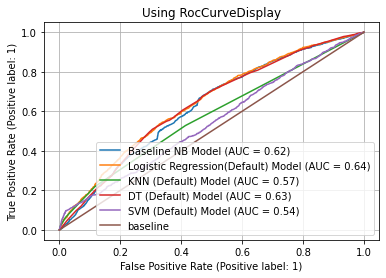

In [538]:
fig, ax = plt.subplots()
plot_roc_curve(Baseline_model, X_test, y_test,ax = ax, name = 'Baseline NB Model')
plot_roc_curve(Log_default, X_test, y_test,ax = ax, name = 'Logistic Regression(Default) Model')
plot_roc_curve(KNN_default, X_test, y_test,ax = ax, name = 'KNN (Default) Model')
plot_roc_curve(DT_default, X_test, y_test,ax = ax, name = 'DT (Default) Model')
plot_roc_curve(SVM_default, X_test, y_test,ax = ax, name = 'SVM (Default) Model')
plt.grid()
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
plt.title('Using RocCurveDisplay')
plt.legend();

In [539]:
## In terms of AUC terms,Logistic regression was the only model performing better than the baseline Naive bayes model
## In prediction terms SVM was doing the best as it give 42% accuracy for class 1

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [540]:
## Plotting rest of categorical columns

In [541]:
feature=['contact', 'month', 'day_of_week','poutcome']

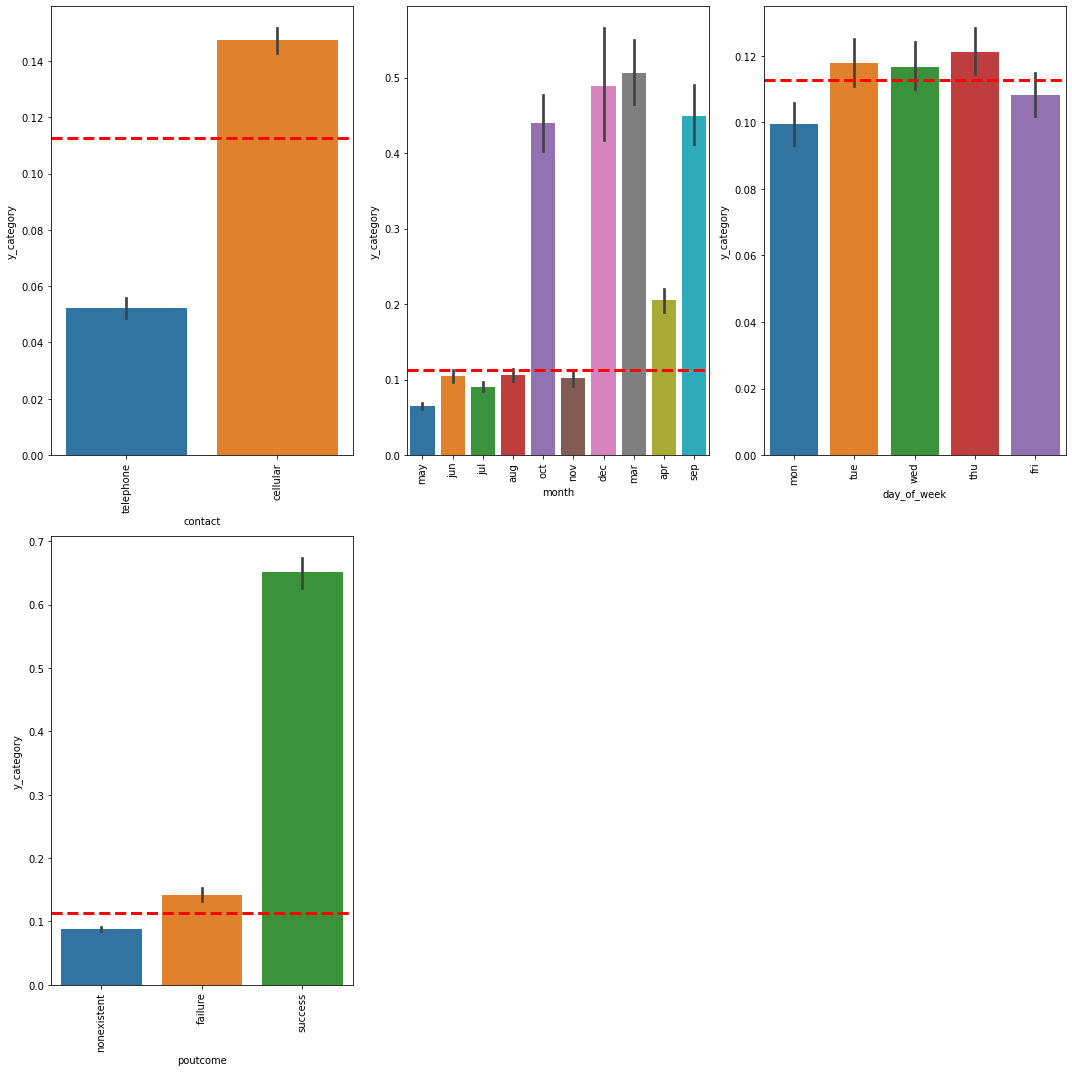

In [542]:
plt.figure(figsize=(15,15))
for i in enumerate(feature):
        plt.subplot(2,3,i[0]+1)
        #plt.ylim(7500,28000)
        fig=sns.barplot(x=i[1],y=df['y_category'],data=df[['contact', 'month', 'day_of_week','poutcome','y_category']])
        plt.axhline(df.y_category.mean(), color='r', linestyle='dashed', linewidth=3)
        plt.xticks(rotation=90)
        plt.tight_layout(h_pad=1)
       
        
       

In [543]:
# forom the above plots we can see that the following have high mean:
# contact=cellular
# day_of_week=tue,wed,thu
# month=oct,dec,mar,apr,sep
# poutcome=failure,success

## Reducing the number of catergories in 'day of week' column

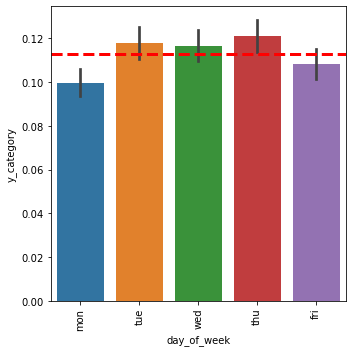

In [544]:
plt.figure(figsize=(5,5))
fig=sns.barplot(x=df['day_of_week'],y=df['y_category'],data=df)
plt.axhline(df.y_category.mean(), color='r', linestyle='dashed', linewidth=3)
plt.xticks(rotation=90)
plt.tight_layout(h_pad=1)

In [545]:
df['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [546]:
df.groupby('day_of_week')['y_category'].mean()

day_of_week
fri    0.108101
mon    0.099507
thu    0.121142
tue    0.117858
wed    0.116671
Name: y_category, dtype: float64

In [547]:
day_of_week_categories={'mon': 'day_of_week_rest',
                    'tue': 'day_of_week_tue_wed_thu', 
                    'wed':'day_of_week_tue_wed_thu', 
                    'thu':'day_of_week_tue_wed_thu', 
                    'fri':'day_of_week_rest', 
                    
                    
}

In [548]:
df['day_of_week_category']=df['day_of_week'].map(day_of_week_categories)

In [549]:
# checking for null values after grouping

In [550]:
df.day_of_week_category.isnull().sum()

0

In [551]:
df.day_of_week_category.value_counts()

day_of_week_tue_wed_thu    24838
day_of_week_rest           16338
Name: day_of_week_category, dtype: int64

In [552]:
df.shape

(41176, 30)

## Reducing the number of catergories in 'month' column

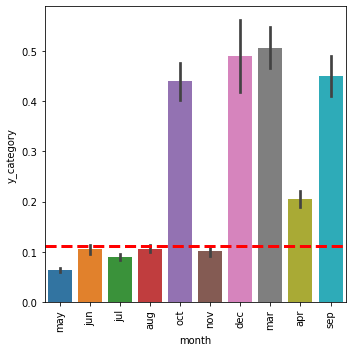

In [553]:
plt.figure(figsize=(5,5))
fig=sns.barplot(x=df['month'],y=df['y_category'],data=df)
plt.axhline(df.y_category.mean(), color='r', linestyle='dashed', linewidth=3)
plt.xticks(rotation=90)
plt.tight_layout(h_pad=1)

In [554]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [555]:
df.groupby('month')['y_category'].mean()

month
apr    0.204865
aug    0.106056
dec    0.489011
jul    0.090389
jun    0.105115
mar    0.505495
may    0.064357
nov    0.101463
oct    0.439331
sep    0.449123
Name: y_category, dtype: float64

In [556]:
month_categories={'may': 'month_rest',
                    'jun': 'month_rest', 
                    'jul':'month_rest', 
                    'aug':'month_rest', 
                    'oct':'month_oct_dec_mar_apr_sep', 
                    'nov':'month_rest', 
                    'dec':'month_oct_dec_mar_apr_sep', 
                    'mar':'month_oct_dec_mar_apr_sep', 
                    'apr':'month_oct_dec_mar_apr_sep',
                     'sep':'month_oct_dec_mar_apr_sep'
                    
}

In [557]:
df['month_category']=df['month'].map(month_categories)

In [558]:
# checking for null values after grouping

In [559]:
df.month_category.isnull().sum()

0

In [560]:
df.month_category.value_counts()

month_rest                   36530
month_oct_dec_mar_apr_sep     4646
Name: month_category, dtype: int64

In [561]:
df.shape

(41176, 31)

In [562]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'y_category',
       'age_bins', 'job_category', 'marital_category', 'education_category',
       'default_category', 'housing_category', 'loan_category',
       'day_of_week_category', 'month_category'],
      dtype='object')

## Reducing the number of catergories in 'poutcome' column

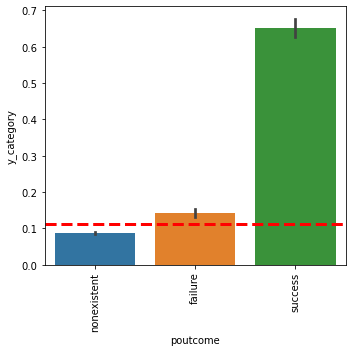

In [563]:
plt.figure(figsize=(5,5))
fig=sns.barplot(x=df['poutcome'],y=df['y_category'],data=df)
plt.axhline(df.y_category.mean(), color='r', linestyle='dashed', linewidth=3)
plt.xticks(rotation=90)
plt.tight_layout(h_pad=1)

In [564]:
df['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [565]:
df.groupby('poutcome')['y_category'].mean()

poutcome
failure        0.142286
nonexistent    0.088324
success        0.651129
Name: y_category, dtype: float64

In [566]:
poutcome_categories={'nonexistent': 'poutcome_nonexistent',
                    'failure': 'poutcome_failure_success', 
                    'success':'poutcome_failure_success'                  
                                 
}

In [567]:
df['poutcome_category']=df['poutcome'].map(poutcome_categories)

In [568]:
# checking for null values after grouping

In [569]:
df.poutcome_category.isnull().sum()

0

In [570]:
df.poutcome_category.value_counts()

poutcome_nonexistent        35551
poutcome_failure_success     5625
Name: poutcome_category, dtype: int64

In [571]:
df.shape

(41176, 32)

In [572]:
# preserving a copy for use with Sklearn  later
#df_Final=df.copy(deep=True)

## Reducing the number of catergories in 'age-bins'

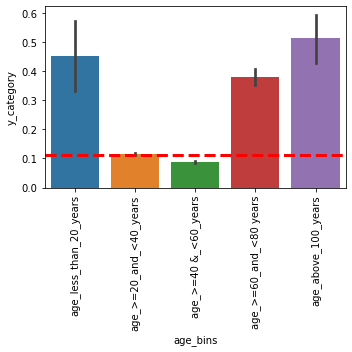

In [573]:
plt.figure(figsize=(5,5))
fig=sns.barplot(x=df['age_bins'],y=df['y_category'],data=df)
plt.axhline(df.y_category.mean(), color='r', linestyle='dashed', linewidth=3)
plt.xticks(rotation=90)
plt.tight_layout(h_pad=1)

In [574]:
df['age_bins'].unique()

['age_>=40 &_<60_years', 'age_>=20_and_<40_years', 'age_>=60_and_<80 years', 'age_less_than_20_years', 'age_above_100_years']
Categories (5, object): ['age_less_than_20_years' < 'age_>=20_and_<40_years' < 'age_>=40 &_<60_years' < 'age_>=60_and_<80 years' < 'age_above_100_years']

In [575]:
df.groupby('age_bins')['y_category'].mean()

age_bins
age_less_than_20_years    0.453333
age_>=20_and_<40_years    0.115560
age_>=40 &_<60_years      0.088012
age_>=60_and_<80 years    0.379079
age_above_100_years       0.513333
Name: y_category, dtype: float64

In [576]:
df.y_category.mean()

0.11266271614532737

In [577]:
age_bins_categories={'age_less_than_20_years': 'age_bin_<20_and_>60',
                    'age_>=20_and_<40_years': 'age_bin_Rest', 
                    'age_>=40 &_<60_years':'age_bin_Rest' ,
                      'age_>=60_and_<80 years':'age_bin_<20_and_>60' ,
                      'age_above_100_years':'age_bin_<20_and_>60' ,
                                 
}

In [578]:
df['age_bins_category']=df['age_bins'].map(age_bins_categories)

In [579]:
# checking for null values after grouping

In [580]:
df.age_bins_category.isnull().sum()

0

In [581]:
df.age_bins_category.value_counts()

age_bin_Rest           39909
age_bin_<20_and_>60     1267
Name: age_bins_category, dtype: int64

In [582]:
df.drop('age_bins',axis=1,inplace=True)

### checking the newly added numerical columns again the Y-category columns

In [583]:
feature1=['duration', 'campaign', 'pdays',
       'previous','emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m', 'nr.employed']

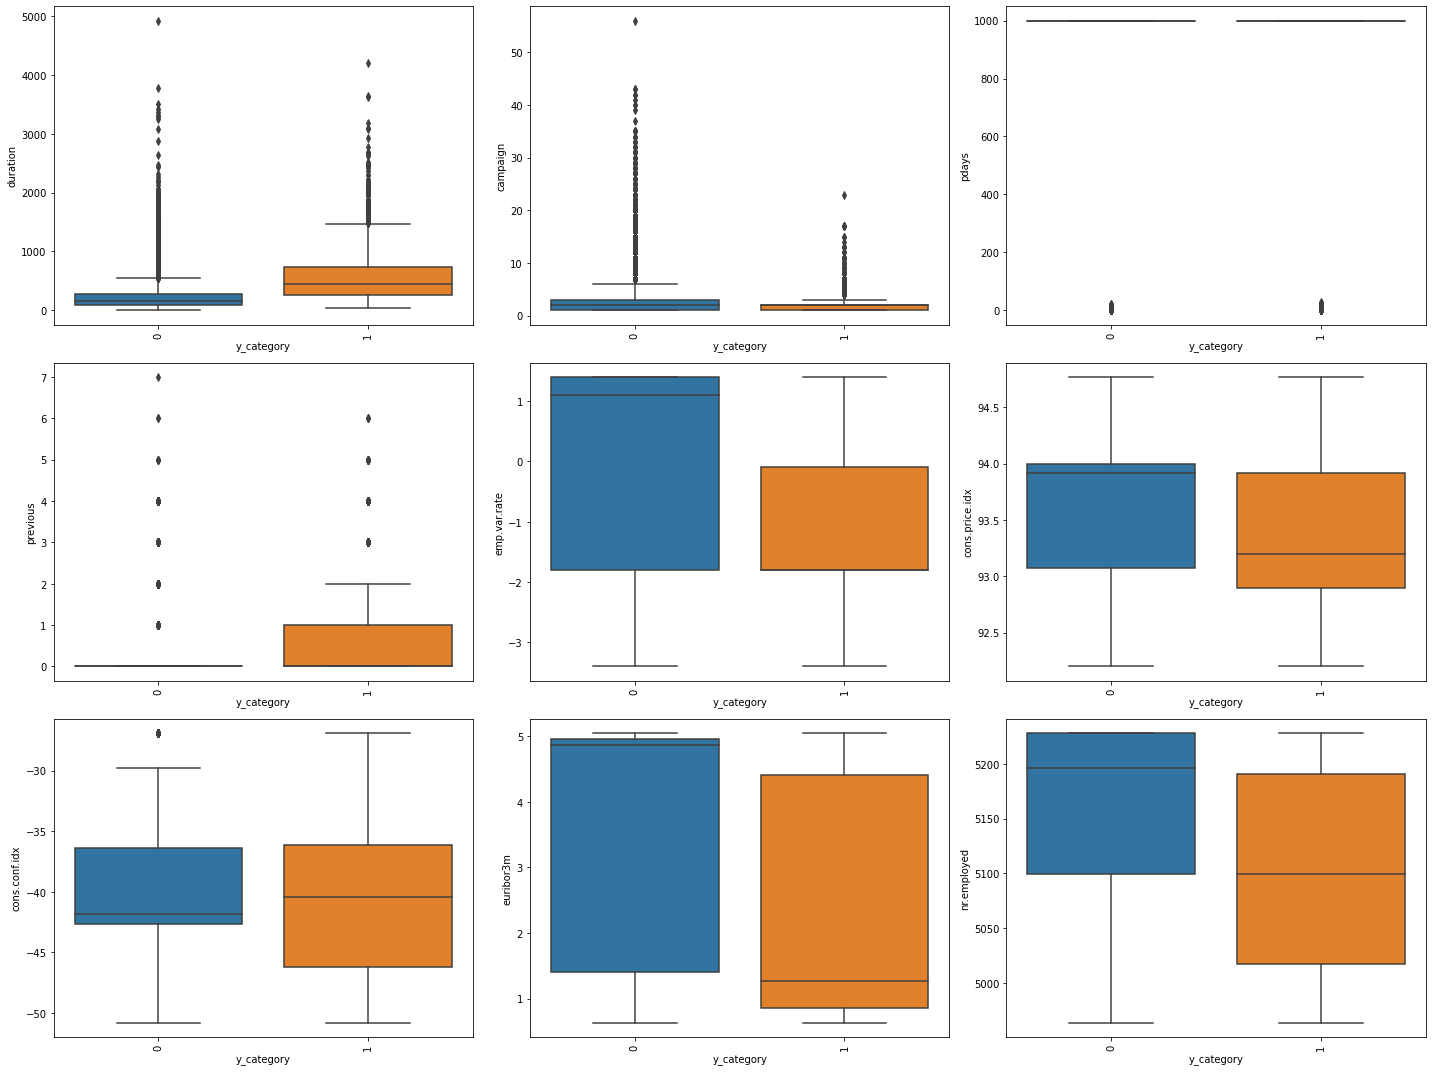

In [584]:
plt.figure(figsize=(20,15))
for i in enumerate(feature1):
        plt.subplot(3,3,i[0]+1)
        #plt.ylim(7500,28000)
        fig=sns.boxplot(x=df['y_category'],y=i[1],data=df[['duration', 'campaign', 'pdays',
       'previous','emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m', 'nr.employed']])
        #plt.axhline(df.i[1].mean(), color='r', linestyle='dashed', linewidth=3)
        plt.xticks(rotation=90)
        plt.tight_layout(h_pad=1)

In [585]:
# checking the Dataframe's shape

In [586]:
df.shape

(41176, 32)

In [587]:
# preserving a copy for use  later if needed
df_Final=df.copy(deep=True)

# Checking for multicollinearity

In [588]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'y_category',
       'job_category', 'marital_category', 'education_category',
       'default_category', 'housing_category', 'loan_category',
       'day_of_week_category', 'month_category', 'poutcome_category',
       'age_bins_category'],
      dtype='object')

In [589]:
#scaling the data

In [590]:
numerical_cols = df.select_dtypes(['float','int']).dropna(axis = 1)
numerical_cols.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'y_category'],
      dtype='object')

In [591]:
# Selecting appropriate numerical columns to scale

In [592]:
cols_to_scale =['duration', 'campaign', 'pdays','previous','emp.var.rate', 'cons.price.idx',
      'cons.conf.idx', 'euribor3m', 'nr.employed']

In [593]:
#create and fit scaler

In [594]:
scaler=StandardScaler()
scaler.fit(df[cols_to_scale])
df[cols_to_scale]=scaler.transform(df[cols_to_scale])

In [595]:
df[cols_to_scale]

,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.010352,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695
1,-0.421577,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695
2,-0.124626,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695
3,-0.413864,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695
4,0.187751,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695
...,...,...,...,...,...,...,...,...,...
41183,0.291876,-0.565963,0.195443,-0.349551,-0.752402,2.058076,-2.225059,-1.495197,-2.815689
41184,0.480845,-0.565963,0.195443,-0.349551,-0.752402,2.058076,-2.225059,-1.495197,-2.815689
41185,-0.267317,-0.204990,0.195443,-0.349551,-0.752402,2.058076,-2.225059,-1.495197,-2.815689
41186,0.708379,-0.565963,0.195443,-0.349551,-0.752402,2.058076,-2.225059,-1.495197,-2.815689


In [596]:
# selecting categorical columns

In [597]:
object_cols = df.select_dtypes(['object']).dropna(axis = 1)
object_cols.columns


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y', 'job_category',
       'marital_category', 'education_category', 'default_category',
       'housing_category', 'loan_category', 'day_of_week_category',
       'month_category', 'poutcome_category', 'age_bins_category'],
      dtype='object')

In [601]:
#Dropping the redundant columnns and creating a new dataframe

In [602]:
df5= df.drop([ 'age','y', 'job',
       'marital', 'education', 'default',
       'housing', 'loan', 'month',
       'day_of_week', 'poutcome'
                    ],axis=1)

In [603]:
df5.columns

Index(['contact', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'y_category', 'job_category', 'marital_category', 'education_category',
       'default_category', 'housing_category', 'loan_category',
       'day_of_week_category', 'month_category', 'poutcome_category',
       'age_bins_category'],
      dtype='object')

In [604]:
# Doing one hot encoding of categrical variables

In [605]:
df6 = pd.get_dummies(df5,columns=['age_bins_category','contact', 'job_category', 'marital_category', 'education_category',
       'default_category', 'housing_category', 'loan_category','month_category','day_of_week_category','poutcome_category'])

In [606]:
df6.columns

Index(['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'y_category', 'age_bins_category_age_bin_<20_and_>60',
       'age_bins_category_age_bin_Rest', 'contact_cellular',
       'contact_telephone',
       'job_category_job_admin_retired_unemployed_student',
       'job_category_job_rest', 'marital_category_marital_rest',
       'marital_category_marital_single_unknown',
       'education_category_education_rest',
       'education_category_education_unknown_university.degree_illiterate',
       'default_category_default_no', 'default_category_default_rest',
       'housing_category_housing_rest', 'housing_category_housing_yes',
       'loan_category_loan_no', 'loan_category_loan_rest',
       'month_category_month_oct_dec_mar_apr_sep', 'month_category_month_rest',
       'day_of_week_category_day_of_week_rest',
       'day_of_week_category_day_of_week_tue_wed_thu',
       'poutcome_category_poutc

In [607]:
X = df6[['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'age_bins_category_age_bin_<20_and_>60',
       'age_bins_category_age_bin_Rest', 'contact_cellular',
       'contact_telephone',
       'job_category_job_admin_retired_unemployed_student',
       'job_category_job_rest', 'marital_category_marital_rest',
       'marital_category_marital_single_unknown',
       'education_category_education_rest',
       'education_category_education_unknown_university.degree_illiterate',
       'default_category_default_no', 'default_category_default_rest',
       'housing_category_housing_rest', 'housing_category_housing_yes',
       'loan_category_loan_no', 'loan_category_loan_rest',
       'month_category_month_oct_dec_mar_apr_sep', 'month_category_month_rest',
       'day_of_week_category_day_of_week_rest',
       'day_of_week_category_day_of_week_tue_wed_thu',
       'poutcome_category_poutcome_failure_success',
       'poutcome_category_poutcome_nonexistent'
         
                
       ]]

In [608]:
# checking VIF of columns

In [609]:
#pd.options.display.max_colwidth = 500
# the independent variables set

  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] =X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

                                                              feature  \
0                                                            duration   
1                                                            campaign   
2                                                               pdays   
3                                                            previous   
4                                                        emp.var.rate   
5                                                      cons.price.idx   
6                                                       cons.conf.idx   
7                                                           euribor3m   
8                                                         nr.employed   
9                               age_bins_category_age_bin_<20_and_>60   
10                                     age_bins_category_age_bin_Rest   
11                                                   contact_cellular   
12                                                 

In [610]:
# cheking with the correlation heatmap 
# some numerical columns have high correlations - eg:nr.employed,euribor3m,emp.var.rate

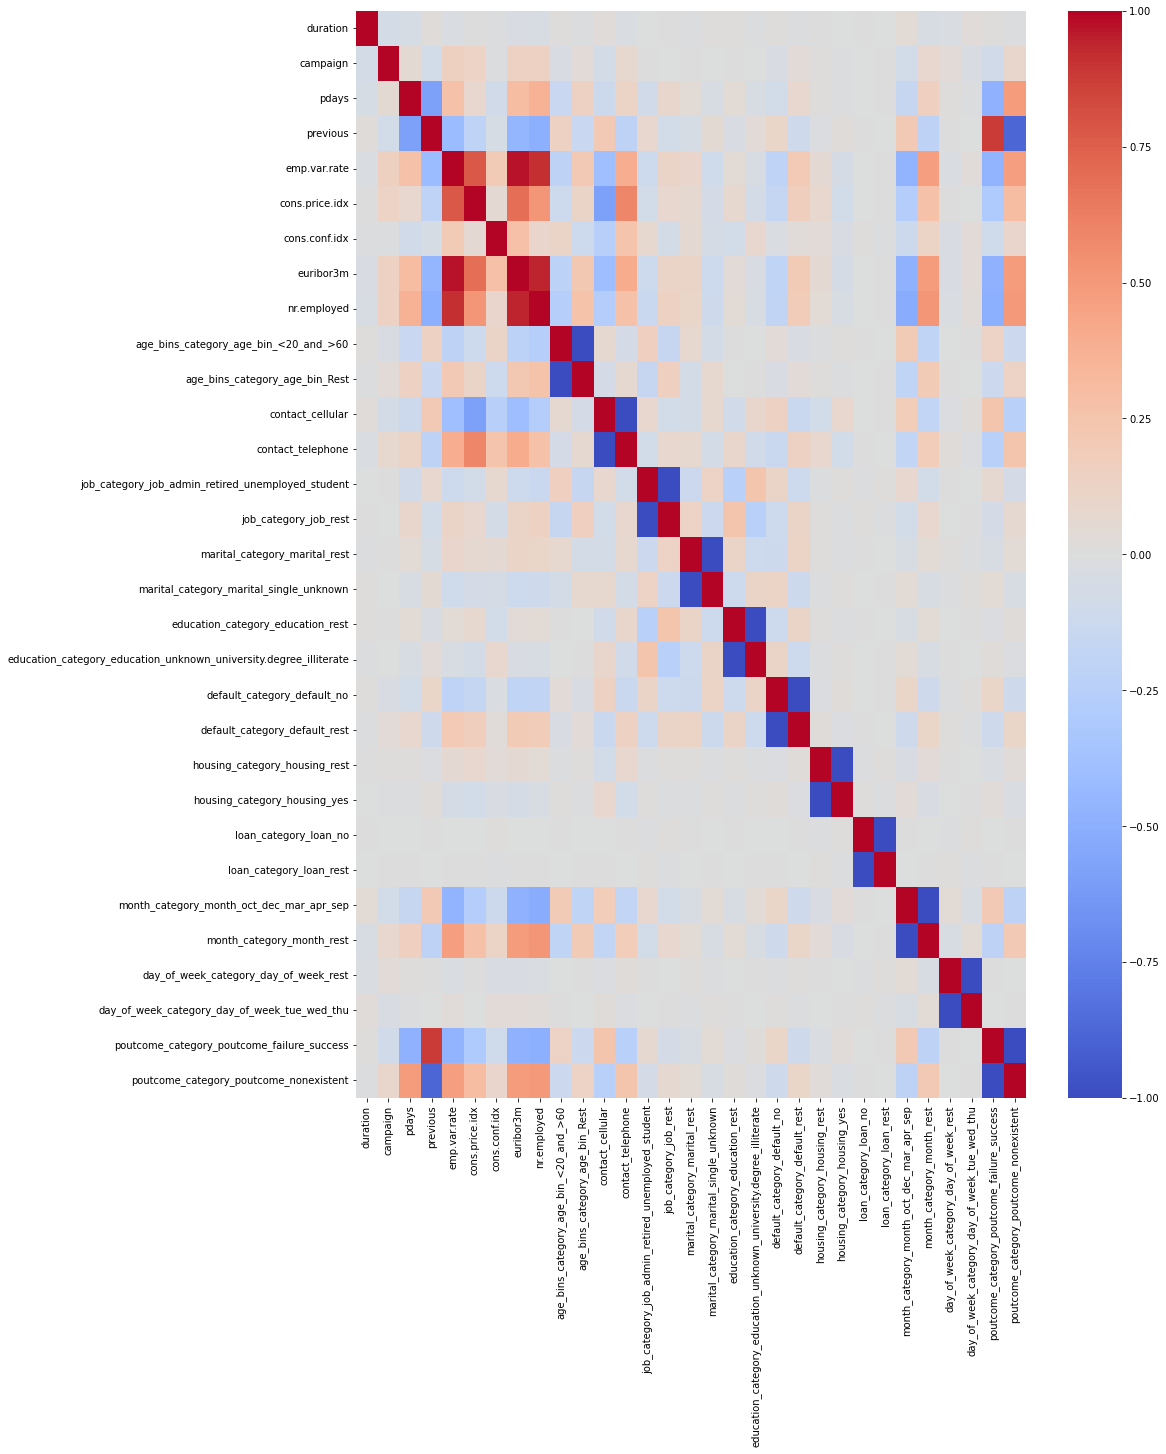

In [611]:
plt.figure(figsize=(15,20))
sns.heatmap(X.corr(),cmap='coolwarm');

In [612]:
## After column adjustment

In [613]:
X_adjusted = df6[['duration', 
                  'campaign', 
                 # 'pdays',
                  'previous',
                  #'emp.var.rate',
       'cons.price.idx', 
                  'cons.conf.idx',
                 # 'euribor3m', 
                  'nr.employed',
        
                  'age_bins_category_age_bin_<20_and_>60',
      # 'age_bins_category_age_bin_Rest', 
                  'contact_cellular',
       #'contact_telephone',
       'job_category_job_admin_retired_unemployed_student',
     #  'job_category_job_rest', 
     #             'marital_category_marital_rest',
       'marital_category_marital_single_unknown',
    #   'education_category_education_rest',
       'education_category_education_unknown_university.degree_illiterate',
       'default_category_default_no',
       #           'default_category_default_rest',
      # 'housing_category_housing_rest',
                  'housing_category_housing_yes',
       'loan_category_loan_no', 
       #           'loan_category_loan_rest',
       'month_category_month_oct_dec_mar_apr_sep', 
                #  'month_category_month_rest',
       #'day_of_week_category_day_of_week_rest',
       'day_of_week_category_day_of_week_tue_wed_thu',
       'poutcome_category_poutcome_failure_success',
       #'poutcome_category_poutcome_nonexistent'
       ]]

In [614]:
# VIF after removing columns creating high multicollinearity

In [615]:
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] =X_adjusted.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_adjusted.values, i)
                          for i in range(len(X_adjusted.columns))]
print(vif_data)

                                                              feature  \
0                                                            duration   
1                                                            campaign   
2                                                            previous   
3                                                      cons.price.idx   
4                                                       cons.conf.idx   
5                                                         nr.employed   
6                               age_bins_category_age_bin_<20_and_>60   
7                                                    contact_cellular   
8                   job_category_job_admin_retired_unemployed_student   
9                             marital_category_marital_single_unknown   
10  education_category_education_unknown_university.degree_illiterate   
11                                        default_category_default_no   
12                                       housing_ca

In [616]:
# Considering only columns after taking care of multicollinearity

In [617]:
df7=df6[['duration', 
                  'campaign',                
                  'previous',                
       'cons.price.idx', 
                  'cons.conf.idx',                
                  'nr.employed',        
                  'age_bins_category_age_bin_<20_and_>60',      
                  'contact_cellular',      
       'job_category_job_admin_retired_unemployed_student',     
       'marital_category_marital_single_unknown',   
       'education_category_education_unknown_university.degree_illiterate',
         'default_category_default_no',      
                  'housing_category_housing_yes',
       'loan_category_loan_no',                  
       'month_category_month_oct_dec_mar_apr_sep',                 
       'day_of_week_category_day_of_week_tue_wed_thu',
       'poutcome_category_poutcome_failure_success',
                'y_category'   ]]

In [618]:
Xmul = df7.drop('y_category',axis=1)
ymul =df7['y_category']

In [619]:
## Train test Split


In [620]:
X_trainmul, X_testmul, y_trainmul, y_testmul = train_test_split(Xmul, ymul, test_size=0.30, random_state=42,stratify=ymul)


## Logistic Regression- Grid Search- for coefficient after multicollinearity check

In [621]:
# Listing parameters for grid search

In [622]:
weights = np.linspace(0.05, 0.99, 25)
tuned_parameters_mul = [{'Log__C': [0.01, 0.1, 1, 10,100],
                     'Log__penalty': ['l2'],
                     'Log__solver': ['newton_cg','liblinear', 'lbfgs','sag','saga'],
                    'Log__class_weight': [{0: x, 1: 1.0-x} for x in weights]
                    
                    },
                    {'Log__C': [0.01, 0.1, 1,10,100],
                     'Log__penalty': ['l1'],
                     'Log__solver': ['liblinear','saga'],
                      'Log__class_weight': [{0: x, 1: 1.0-x} for x in weights]
                    }]

In [623]:
Log_pipe_grid_mul=Pipeline([('Log',LogisticRegression())])

In [624]:
Log_Grid_mul=GridSearchCV(Log_pipe_grid_mul,param_grid=tuned_parameters_mul,cv=5,n_jobs=-1,scoring='roc_auc' )

In [625]:
Log_start_grid_mul = time.time()
Log_Grid_mul.fit(X_trainmul,y_trainmul)
Log_end_grid_mul= time.time()
Log_grid_train_time_mul= Log_end_grid_mul -Log_start_grid_mul
Log_grid_train_time_mul

340.3354139328003

In [626]:
# Best Params from Grid Search

In [627]:
Log_Grid_bestParams_mul=Log_Grid_mul.best_params_
Log_Grid_bestParams_mul

{'Log__C': 1,
 'Log__class_weight': {0: 0.08916666666666667, 1: 0.9108333333333334},
 'Log__penalty': 'l2',
 'Log__solver': 'liblinear'}

In [628]:
#AUC train accuracy-using probabilites

In [629]:
Log_Grid_train_accuracy_mul=roc_auc_score(y_trainmul,Log_Grid_mul.predict_proba(X_trainmul)[:, 1])

Log_Grid_train_accuracy_mul

0.9255698747064132

In [630]:
# AUC test accuracy-using probabilites

In [631]:
Log_Grid_test_accuracy_mul=roc_auc_score(y_testmul,Log_Grid_mul.predict_proba(X_testmul)[:, 1])

Log_Grid_test_accuracy_mul

0.9275792137117282

In [632]:
# Building a log model using best params to know the important features

In [633]:
Log_pipe_grid_mul_optimal= Pipeline([('Log',LogisticRegression(
                       C= 1,
 class_weight= {0: 0.05, 1: 0.95},
 penalty= 'l1',
 solver='liblinear'       )),
                         ])

In [634]:
Log_pipe_grid_mul_optimal.fit(X_trainmul,y_trainmul)

Pipeline(steps=[('Log',
                 LogisticRegression(C=1, class_weight={0: 0.05, 1: 0.95},
                                    penalty='l1', solver='liblinear'))])

In [635]:
#Log_pipe_grid_mul_optimal[-1].

In [636]:
## Getting coefficeints outs

In [637]:
feature_names =X_trainmul.columns

coefs = pd.DataFrame(
  Log_pipe_grid_mul_optimal['Log'].coef_.T,
   columns=["Coefficients"],
    index=feature_names,
)

coefs

,Coefficients
duration,1.967142
campaign,-0.098425
previous,0.163538
cons.price.idx,-0.150932
cons.conf.idx,0.190791
nr.employed,-1.047557
age_bins_category_age_bin_<20_and_>60,0.643725
contact_cellular,0.423452
job_category_job_admin_retired_unemployed_student,0.248743
marital_category_marital_single_unknown,0.219721


In [638]:
# Plotting the coefficients

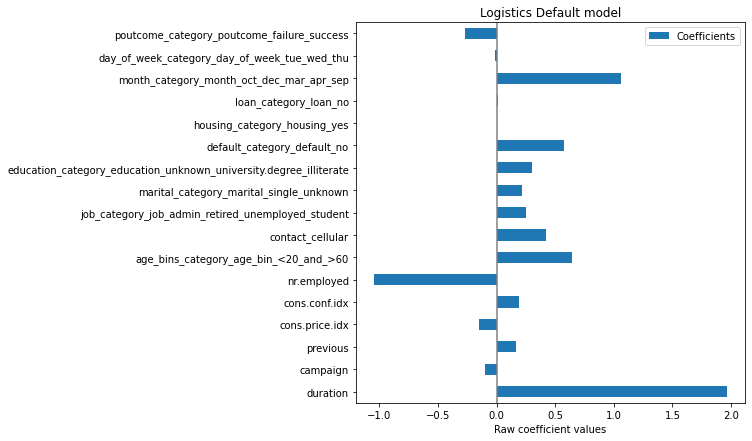

In [639]:
coefs.plot.barh(figsize=(9, 7))
plt.title("Logistics Default model")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

###  Checking the variability of the coefficients
### If coefficients vary significantly when changing the input dataset their robustness 
### is not guaranteed, and they should probably be interpreted with caution.

In [640]:
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
cv_model_log_mul = cross_validate(
   Log_pipe_grid_mul_optimal,
   X_trainmul,
    y_trainmul,   
    
    cv=cv,
    return_estimator=True,
    n_jobs=2,
)
coefs = pd.DataFrame(
    [est[-1].coef_[0] for est in cv_model_log_mul["estimator"]],\
    columns=feature_names
)

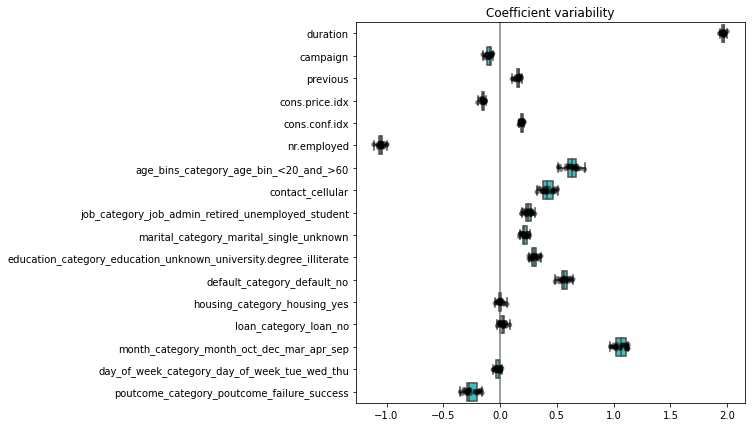

In [641]:
plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", color="k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5, whis=10)
plt.axvline(x=0, color=".5")
plt.title("Coefficient variability")
plt.subplots_adjust(left=0.3)

In [642]:
# Checking variability using permutation importance

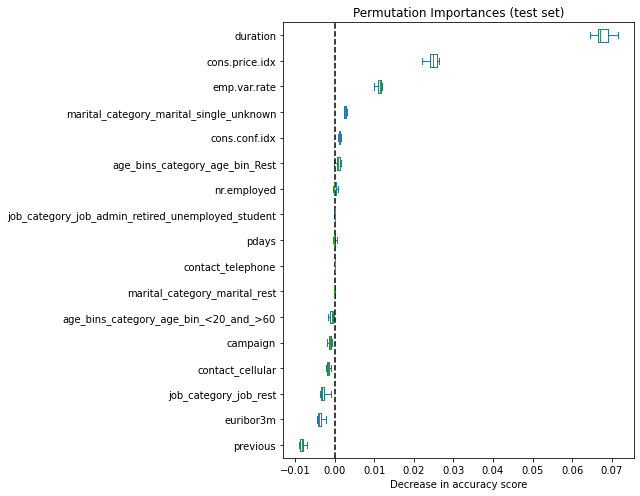

In [643]:
result = permutation_importance(
    Log_pipe_grid_mul_optimal,X_trainmul,y_trainmul, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10,figsize=(9, 7))
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

#### The above shows that the important Features are:
#### 1)duration (positive) 
#### 2)nr.employed(negative)
#### 3)month(positive)
#### 4)default(positive)
#### 5)age(positive) 
#### 6)contact(positive)


In [ ]:
## ROC curve-AUC to compare the models performance against baseline NB Model and absolute baseline

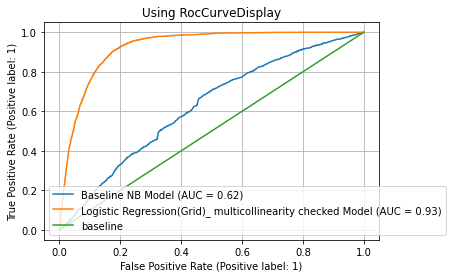

In [783]:
fig, ax = plt.subplots()
plot_roc_curve(Baseline_model, X_test, y_test,ax = ax, name = 'Baseline NB Model')
plot_roc_curve(Log_Grid_mul, X_trainmul,y_trainmul,ax = ax, name = 'Logistic Regression(Grid)_ multicollinearity checked Model')
plt.grid()
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
plt.title('Using RocCurveDisplay')
plt.legend();

## Logistic Regression- Grid Search with all columns and all parameters

In [645]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'y_category',
       'job_category', 'marital_category', 'education_category',
       'default_category', 'housing_category', 'loan_category',
       'day_of_week_category', 'month_category', 'poutcome_category',
       'age_bins_category'],
      dtype='object')

In [646]:
df1=df[['age_bins_category', 'contact','job_category', 'marital_category', 'education_category',
       'default_category', 'housing_category', 'loan_category',
       'month_category', 'day_of_week_category', 'poutcome_category',
        'duration', 'campaign', 'pdays',
       'previous','emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m', 'nr.employed' ,'y_category']]

In [647]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'y_category',
       'job_category', 'marital_category', 'education_category',
       'default_category', 'housing_category', 'loan_category',
       'day_of_week_category', 'month_category', 'poutcome_category',
       'age_bins_category'],
      dtype='object')

In [648]:
Xgrid = df.drop(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                 'month', 'day_of_week', 'poutcome','y_category','y']
                 ,axis=1)
ygrid =df['y_category']

In [649]:
## Train test Split


In [650]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(Xgrid, ygrid, test_size=0.30, random_state=42,stratify=ygrid)


In [651]:
# setting up a preprocessor

In [652]:
categorical_features = ['age_bins_category','job_category', 'marital_category', 'education_category',
       'default_category', 'housing_category', 'loan_category','contact',
       'month_category', 'day_of_week_category', 'poutcome_category']

numerical_features = ['duration', 'campaign', 'pdays',
       'previous','emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m', 'nr.employed']

numeric_transformer = Pipeline(
    steps=[
        ("scaler", StandardScaler())]
)

categorical_transformer =  Pipeline(steps=[
    ('onehot', OneHotEncoder(drop="if_binary"))
])



preprocessor_GS = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
        
    ])

In [653]:
# parameters for Grid Search

In [654]:
weights = np.linspace(0.05, 0.99, 25)
tuned_parameters = [{'Log__C': [0.01, 0.1, 1, 10,100],
                     'Log__penalty': ['l2'],
                     'Log__solver': ['newton_cg','liblinear', 'lbfgs','sag','saga'],
                    'Log__class_weight': [{0: x, 1: 1.0-x} for x in weights]
                    
                    },
                    {'Log__C': [0.01, 0.1, 1,10,100],
                     'Log__penalty': ['l1'],
                     'Log__solver': ['liblinear','saga'],
                      'Log__class_weight': [{0: x, 1: 1.0-x} for x in weights]
                    }]

In [655]:
Log_pipe_grid= Pipeline([('preprocessor', preprocessor_GS),
                                                  ('Log',LogisticRegression())])

In [656]:
Log_Grid= GridSearchCV(Log_pipe_grid,param_grid=tuned_parameters,cv=5,n_jobs=-1,scoring='roc_auc')

In [657]:
Log_start_grid = time.time()
Log_Grid.fit(X_train1,y_train1)
Log_end_grid= time.time()
Log_grid_train_time= Log_end_grid -Log_start_grid
Log_grid_train_time

733.6760745048523

In [658]:
# Best Params after grid search 

In [659]:
Log_Grid_bestParams=Log_Grid.best_params_
Log_Grid_bestParams

{'Log__C': 1,
 'Log__class_weight': {0: 0.08916666666666667, 1: 0.9108333333333334},
 'Log__penalty': 'l2',
 'Log__solver': 'liblinear'}

In [660]:
# AUC train accuracy after Grid Seach-using probabilites

In [661]:
Log_Grid_train_accuracy=roc_auc_score(y_train1,Log_Grid.predict_proba(X_train1)[:, 1])

Log_Grid_train_accuracy

0.9333768935093618

In [662]:
# AUC test accuracy after Grid Seach-using probabilites

In [663]:
Log_Grid_test_accuracy=roc_auc_score(y_test1,Log_Grid.predict_proba(X_test1)[:, 1])

Log_Grid_test_accuracy

0.933647915231327

In [664]:
# AUC test accuracy using predictions

In [665]:
y_pred_Log_Grid = Log_Grid.predict(X_test1)
fp_rate, tp_rate, thresholds = roc_curve(y_test1, y_pred_Log_Grid)
metrics.auc(fp_rate, tp_rate)

0.8753062385762688

In [666]:
# Plots

In [667]:
# PLot -1: ROC curve-AUC to compare the models performance against baseline NB Model and absolute baseline

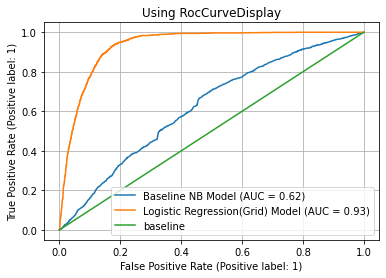

In [668]:
fig, ax = plt.subplots()
plot_roc_curve(Baseline_model, X_test, y_test,ax = ax, name = 'Baseline NB Model')
plot_roc_curve(Log_Grid, X_test1, y_test1,ax = ax, name = 'Logistic Regression(Grid) Model')
plt.grid()
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
plt.title('Using RocCurveDisplay')
plt.legend();


In [669]:
# PLot -2 : AUC using SKLPT to show the macro and micro AUC for different classes

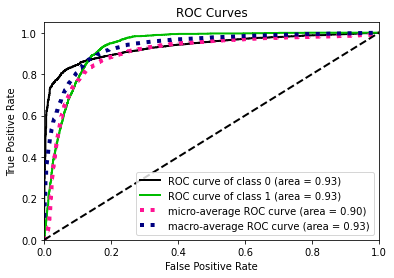

In [670]:
skplt.metrics.plot_roc_curve(y_test1, Log_Grid.predict_proba(X_test1))
plt.show()

In [671]:
## Plot -3 Confusion Matrix- for Test data

<Figure size 2520x1440 with 0 Axes>

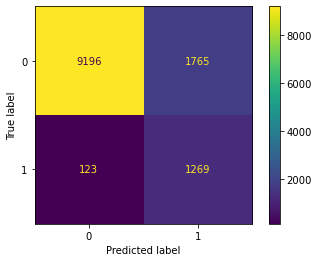

In [672]:
plt.figure(figsize=(35,20))
plot_confusion_matrix(Log_Grid,X_test1,y_test1);

In [673]:
## Plot-4:Classification report showing all major metrics

In [674]:
print(classification_report(y_test1,Log_Grid.predict(X_test1)))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     10961
           1       0.42      0.91      0.57      1392

    accuracy                           0.85     12353
   macro avg       0.70      0.88      0.74     12353
weighted avg       0.92      0.85      0.87     12353



In [675]:
##Plot5: Lift curve showing the deciles to be used by marketing to decide how many contacts to and compare with other models

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

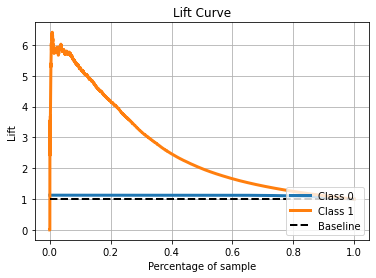

In [676]:
skplt.metrics.plot_lift_curve(y_test1,Log_Grid.predict_proba(X_test1))


In [677]:
## Setting up a model with Best Parameters from Grid Search to get the important Features

In [678]:
Log_pipe_optimal= Pipeline([('preprocessor', preprocessor_GS),
                        
                         ('Log',LogisticRegression(
                         C= 1,
 class_weight= {0: 0.08916666666666667, 1: 0.9108333333333334},
 penalty='l2',                            
 solver= 'liblinear'    )
                                                  )
                         ])

In [679]:
Log_pipe_optimal.fit(X_train1,y_train1)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'campaign',
                                                   'pdays', 'previous',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  ['age_bins_category',
                                                   'job_category',
                                                   'marital_category',
                                                   'education_category',
                                                   'default_category',
                                                   'housing_category',
                                                   'loan_category', 'contact',
                                                   'month_category',
                                                   'day_of_week_category',
                                                   'poutcome_category'])])),
                ('Log',
                 LogisticRegression(C=1,
                                    class_weight={0: 0.08916666666666667,
                                                  1: 0.9108333333333334},
                                    solver='liblinear'))])

In [680]:
## Getting coefficeints outs

In [681]:
feature_names =Log_pipe_optimal[:-1].get_feature_names_out()

coefs = pd.DataFrame(
  Log_pipe_optimal['Log'].coef_.T,
   columns=["Coefficients"],
    index=feature_names,
)

coefs

,Coefficients
num__duration,1.829089
num__campaign,-0.036029
num__pdays,-0.404160
num__previous,-0.023877
num__emp.var.rate,-1.991133
num__cons.price.idx,0.579360
num__cons.conf.idx,0.170925
num__euribor3m,0.951065
num__nr.employed,-0.367920
cat__age_bins_category_age_bin_Rest,-0.642308


In [682]:
# Plotting the coefficients by size

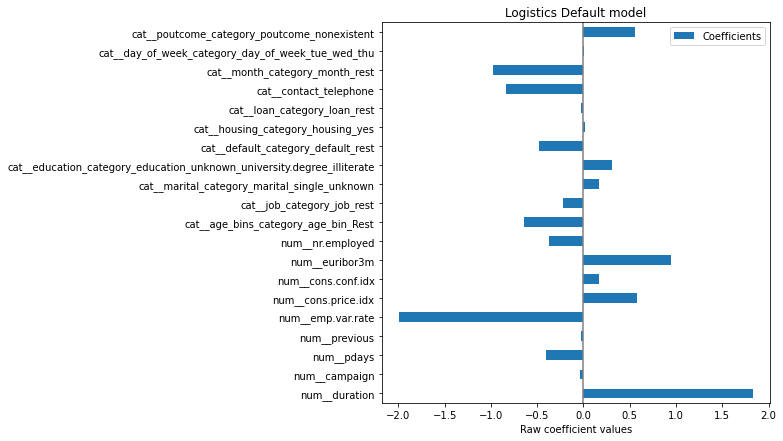

In [683]:
coefs.plot.barh(figsize=(9, 7))
plt.title("Logistics Default model")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

####  Checking the variability of the coefficients
#### If coefficients vary significantly when changing the input dataset their robustness 
#### is not guaranteed, and they should probably be interpreted with caution.

In [684]:
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
cv_model_log = cross_validate(
   Log_pipe_optimal,
    X_train1,
    y_train1,
    cv=cv,
    return_estimator=True,
    n_jobs=2,
)
coefs = pd.DataFrame(
    [est[-1].coef_[0] for est in cv_model_log["estimator"]],\
    columns=feature_names
)

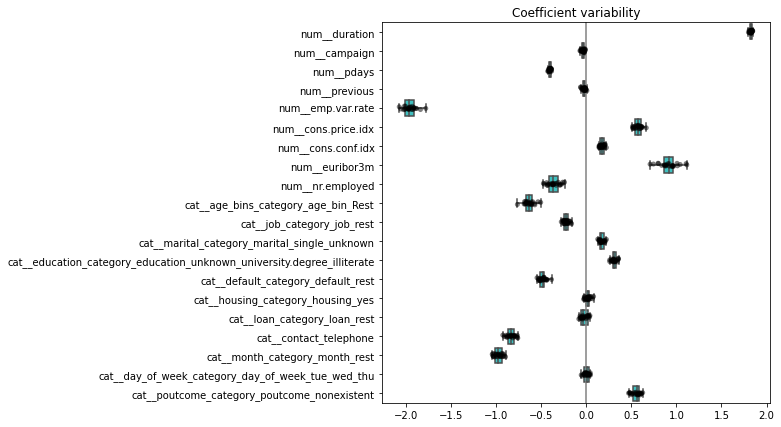

In [685]:
plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", color="k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5, whis=10)
plt.axvline(x=0, color=".5")
plt.title("Coefficient variability")
plt.subplots_adjust(left=0.3)

## KNN algorithm - Grid Search with all columns and all parameters

In [686]:
k_values    = range(1,41,2)
weights    = ['uniform' , 'distance']
#algos      = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_sizes = range(10, 60, 10)    
metrics = ["euclidean", "manhattan", "chebyshev", "minkowski", "mahalanobis"]

In [687]:
parameters =  {'KNN__n_neighbors':k_values,
    'KNN__weights': weights,
     #'KNN__algorithm': algos,
     'KNN__leaf_size':leaf_sizes,
      'KNN__metric':metrics
    }

In [688]:
KNN_pipe = Pipeline(
    steps=[("preprocessor", preprocessor_GS), ('KNN',KNeighborsClassifier())]
)


In [689]:
KNN_Grid = GridSearchCV(KNN_pipe,param_grid=parameters,cv=5,n_jobs=-1,scoring='roc_auc')

In [690]:
KNN_start = time.time()
KNN_Grid.fit(X_train1,y_train1)
KNN_end = time.time()
KNN_fit_time_grid= KNN_end-KNN_start
KNN_fit_time_grid

3484.235451221466

In [691]:
# Best Params after grid search 

In [692]:
KNN_Grid_bestParams=KNN_Grid.best_params_
KNN_Grid_bestParams

{'KNN__leaf_size': 10,
 'KNN__metric': 'euclidean',
 'KNN__n_neighbors': 39,
 'KNN__weights': 'uniform'}

In [693]:
# AUC train accuracy-using probabilites

In [694]:
KNN_Grid_train_accuracy=roc_auc_score(y_train1,KNN_Grid.predict_proba(X_train1)[:, 1])

KNN_Grid_train_accuracy

0.9440888459008238

In [695]:
# AUC test accuracy-using probabilites

In [696]:
KNN_Grid_test_accuracy=roc_auc_score(y_test1,KNN_Grid.predict_proba(X_test1)[:, 1])

KNN_Grid_test_accuracy

0.9334699068903647

In [697]:
# AUC test accuracy using predictions

In [700]:
y_pred_KNN_Grid = KNN_Grid.predict(X_test1)
fp_rate, tp_rate, thresholds = roc_curve(y_test1, y_pred_KNN_Grid)
metrics.auc(fp_rate, tp_rate)

0.6879605867511458

In [ ]:
# Plots

In [ ]:
# PLot -1: ROC curve-AUC to compare KNN models performance against baseline NB Model and absolute baseline

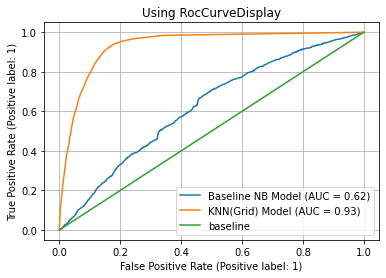

In [701]:
fig, ax = plt.subplots()
plot_roc_curve(Baseline_model, X_test, y_test,ax = ax, name = 'Baseline NB Model')
plot_roc_curve(KNN_Grid, X_test1, y_test1,ax = ax, name = 'KNN(Grid) Model')
plt.grid()
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
plt.title('Using RocCurveDisplay')
plt.legend();

In [ ]:
# PLot -2 : AUC using SKLPT to show the macro and micro AUC for different classes

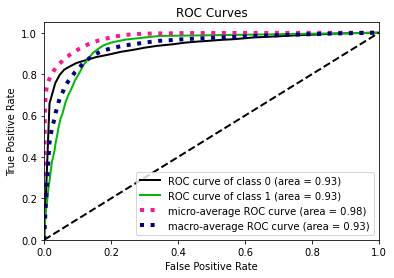

In [702]:
skplt.metrics.plot_roc_curve(y_test1, KNN_Grid.predict_proba(X_test1))
plt.show()

In [ ]:
## Plot -3 Confusion Matrix- for Test data

<Figure size 2520x1440 with 0 Axes>

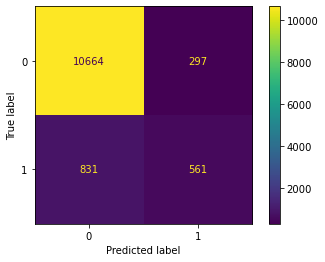

In [703]:
plt.figure(figsize=(35,20))
plot_confusion_matrix(KNN_Grid,X_test1,y_test1);

In [ ]:
## Plot -4 Classification Report - Test data

In [704]:
print(classification_report(y_test1,KNN_Grid.predict(X_test1)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10961
           1       0.65      0.40      0.50      1392

    accuracy                           0.91     12353
   macro avg       0.79      0.69      0.72     12353
weighted avg       0.90      0.91      0.90     12353



In [ ]:
## Plot-5 Lift curve showing the deciles to be used by marketing to decide how many contacts to and compare with other models

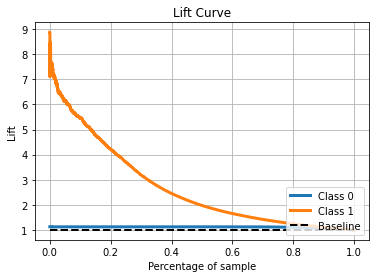

In [705]:
skplt.metrics.plot_lift_curve(y_test1,KNN_Grid.predict_proba(X_test1));


## Decision Tree- Grid Search with all columns and all parameters

In [ ]:
# Parameters considered for Decision tree grid search

In [732]:
max_depth_values=range(1, 10, 1)
criterion_values=['gini','entropy']
min_samples_leaf_values=range(1, 5, 1)
min_samples_split_values=np.linspace(0.05, 1.0, 10, endpoint=True)

In [733]:
parameters2 = {'DT__max_depth': max_depth_values,
              'DT__criterion': criterion_values,
          'DT__min_samples_leaf': min_samples_leaf_values,
          'DT__min_samples_split': min_samples_split_values,
          'DT__class_weight':[{0: w} for w in [1, 2, 4, 6, 10]]
         }

In [ ]:
# Creating a pipe line and Grid Search

In [734]:
DT_pipe_grid= Pipeline([("preprocessor", preprocessor_GS),('DT',DecisionTreeClassifier())])

In [735]:
DT_Grid = GridSearchCV(DT_pipe_grid,param_grid=parameters2,cv=5,n_jobs=-1,scoring='roc_auc')

In [ ]:
# Fitting and estimating train time

In [736]:
DT_start = time.time()
DT_Grid.fit(X_train1,y_train1)
DT_end = time.time()
DT_fit_time_grid= DT_end-DT_start
DT_fit_time_grid

1143.5626266002655

In [ ]:
# Best Params after Grid Search

In [737]:
DT_Grid_bestParams=DT_Grid.best_params_
DT_Grid_bestParams

{'DT__class_weight': {0: 4},
 'DT__criterion': 'entropy',
 'DT__max_depth': 9,
 'DT__min_samples_leaf': 1,
 'DT__min_samples_split': 0.05}

In [ ]:
# AUC train accuracy-using probabilites

In [738]:
DT_Grid_train_accuracy=roc_auc_score(y_train1,DT_Grid.predict_proba(X_train1)[:, 1])

DT_Grid_train_accuracy

0.939751609218644

In [ ]:
# AUC test accuracy-using probabilites

In [739]:
DT_Grid_test_accuracy=roc_auc_score(y_test1,DT_Grid.predict_proba(X_test1)[:, 1])

DT_Grid_test_accuracy

0.9361615621005299

In [ ]:
# AUC test accuracy using predictions

In [740]:
y_pred_DT_Grid = DT_Grid.predict(X_test1)
fp_rate, tp_rate, thresholds = roc_curve(y_test1, y_pred_DT_Grid)
metrics.auc(fp_rate, tp_rate)

0.5769189050101352

In [ ]:
# Plots

In [ ]:
# PLot -1: ROC curve-AUC to compare DT model's performance against baseline NB Model and absolute baseline

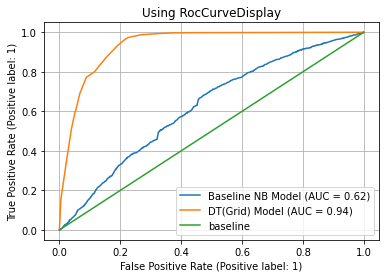

In [741]:
fig, ax = plt.subplots()
plot_roc_curve(Baseline_model, X_test, y_test,ax = ax, name = 'Baseline NB Model')
plot_roc_curve(DT_Grid, X_test1, y_test1,ax = ax, name = 'DT(Grid) Model')
plt.grid()
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
plt.title('Using RocCurveDisplay')
plt.legend();


In [ ]:
#PLot -2 : AUC using SKLPT to show the macro and micro AUC for different classes 

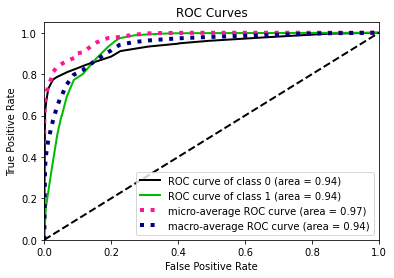

In [742]:
skplt.metrics.plot_roc_curve(y_test1, DT_Grid.predict_proba(X_test1))
plt.show()

In [ ]:
## Plot -3 Confusion Matrix- Test data

<Figure size 2520x1440 with 0 Axes>

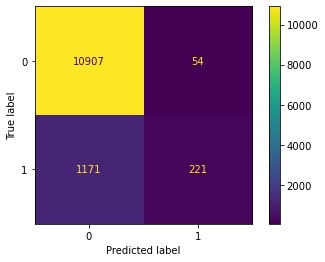

In [743]:
plt.figure(figsize=(35,20))
plot_confusion_matrix(DT_Grid,X_test1,y_test1);

In [ ]:
## Plot -4 Classification- Test Data

In [744]:
print(classification_report(y_test1,DT_Grid.predict(X_test1)))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     10961
           1       0.80      0.16      0.27      1392

    accuracy                           0.90     12353
   macro avg       0.85      0.58      0.61     12353
weighted avg       0.89      0.90      0.87     12353



In [ ]:
## Plot -5 Lift curve showing the deciles to be used by marketing to decide how many contacts to and compare with other models

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

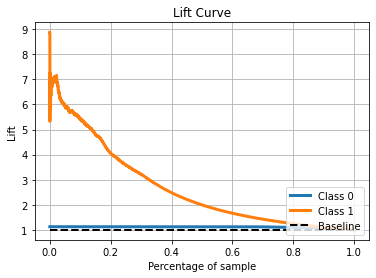

In [745]:
skplt.metrics.plot_lift_curve(y_test1,DT_Grid.predict_proba(X_test1))


## Using SVM - Grid Search with all columns and all parameters

In [ ]:
# Parameters considered for SVM  grid search

In [724]:
parameters_SV ={'SVC__C':[1,5,10,100],
            'SVC__kernel':['sigmoid','linear', 'poly', 'rbf'],
            'SVC__gamma':['scale','auto']
                    }

In [ ]:
# Creating a pipe line and Grid Search

In [725]:
SVM_pipe_Grid = Pipeline(
    steps=[("preprocessor", preprocessor_GS), ('SVC',SVC(class_weight='balanced',probability=True))]
)

In [ ]:
# Fitting and estimating train time

In [714]:
#SVM_Grid=RandomizedSearchCV(SVM_pipe_Grid,parameters_SV,cv= 10,scoring="roc_auc", n_jobs = -1)

In [726]:
SVM_Grid= HalvingGridSearchCV(SVM_pipe_Grid, parameters_SV, cv=5,factor=2,max_resources=40,aggressive_elimination=True)
                           

In [727]:
SVM_start = time.time()
SVM_Grid.fit(X_train1,y_train1)
SVM_end=time.time()
SVM_fit_time_grid=SVM_end-SVM_start
SVM_fit_time_grid

209.83194065093994

In [ ]:
# Best parameters for Grid Search

In [728]:
SVM_Grid_bestParams=SVM_Grid.best_params_
SVM_Grid_bestParams

{'SVC__C': 100, 'SVC__gamma': 'auto', 'SVC__kernel': 'rbf'}

In [ ]:
# AUC train accuracy-using probabilites for SVM Model

In [729]:
SVM_Grid_train_accuracy=roc_auc_score(y_train1,SVM_Grid.predict_proba(X_train1)[:, 1])

SVM_Grid_train_accuracy

0.9605641667354645

In [ ]:
# AUC test accuracy-using probabilites for SVM probabilities

In [730]:
SVM_Grid_test_accuracy=roc_auc_score(y_test1,SVM_Grid.predict_proba(X_test1)[:, 1])

SVM_Grid_test_accuracy

0.9241609751186809

In [ ]:
# AUC test accuracy using predictions

In [731]:
y_pred_SVM_Grid = SVM_Grid.predict(X_test1)
fp_rate, tp_rate, thresholds = roc_curve(y_test1, y_pred_SVM_Grid)
metrics.auc(fp_rate, tp_rate)

0.8613726946740115

In [ ]:
# Plots

In [ ]:
# PLot -1 ROC curve-AUC to compare SVM models performance against baseline NB Model and absolute baseline

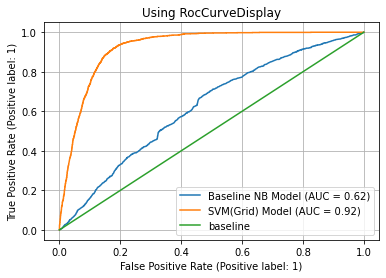

In [750]:
fig, ax = plt.subplots()
plot_roc_curve(Baseline_model, X_test, y_test,ax = ax, name = 'Baseline NB Model')
plot_roc_curve(SVM_Grid, X_test1, y_test1,ax = ax, name = 'SVM(Grid) Model')
plt.grid()
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
plt.title('Using RocCurveDisplay')
plt.legend();

In [ ]:
# PLot -2 AUC using SKLPT to show the macro and micro AUC for different classes 

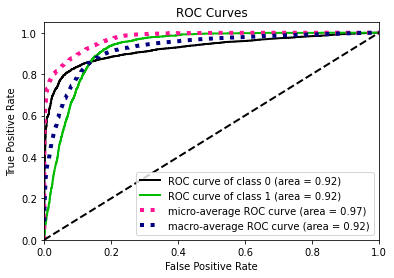

In [751]:

skplt.metrics.plot_roc_curve(y_test1, SVM_Grid.predict_proba(X_test1))
plt.show()

In [752]:
## Plot -3 Confusion Matrix- Test data

<Figure size 2520x1440 with 0 Axes>

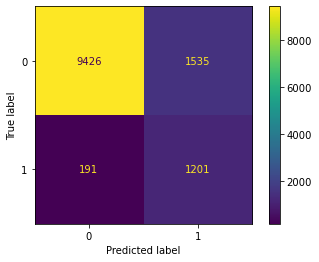

In [753]:
plt.figure(figsize=(35,20))
plot_confusion_matrix(SVM_Grid,X_test1,y_test1);

In [ ]:
## Plot -4 classification Report- Test

In [754]:
print(classification_report(y_test1,SVM_Grid.predict(X_test1)))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92     10961
           1       0.44      0.86      0.58      1392

    accuracy                           0.86     12353
   macro avg       0.71      0.86      0.75     12353
weighted avg       0.92      0.86      0.88     12353



In [ ]:
## Plot-5 Plot 5: Lift curve showing the deciles to be used by marketing

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

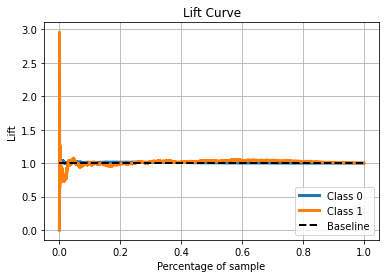

In [755]:
skplt.metrics.plot_lift_curve(y_test,SVM_Grid.predict_proba(X_test1))


# Logistic Regression with SMOTE -Grid Search with all columns and all parameters

In [ ]:
# Parameters considered for Logistic Regression with Smote and grid search

In [762]:
tuned_parameters_smote = [{'Log__C': [0.01, 0.1, 1, 10,100],
                     'Log__penalty': ['l2'],
                     'Log__solver': ['newton_cg','liblinear', 'lbfgs','sag','saga'],
                    #'Log__class_weight': [{0: x, 1: 1.0-x} for x in weights]
                    
                    },
                    {'Log__C': [0.01, 0.1, 1,10,100],
                     'Log__penalty': ['l1'],
                     'Log__solver': ['liblinear','saga'],
                     # 'Log__class_weight': [{0: x, 1: 1.0-x} for x in weights]
                    }]

In [763]:
# Creating a pipeline and Grid search

In [764]:
Log_pipe_grid_smote= Pipeline([('preprocessor', preprocessor_GS),
                         ('Smote',SMOTE(random_state=101,sampling_strategy="minority")),\
                         ('Log',LogisticRegression(LogisticRegression()))])

In [765]:
Log_Grid_Smote= GridSearchCV(Log_pipe_grid_smote,param_grid=tuned_parameters_smote,cv=5,n_jobs=-1,scoring='roc_auc')

In [ ]:
#  Grid search and train time

In [766]:
Log_start_grid = time.time()
Log_Grid_Smote.fit(X_train1,y_train1)
Log_end_grid= time.time()
Log_grid_Smote_train_time= Log_end_grid -Log_start_grid
Log_grid_Smote_train_time

37.742576360702515

In [ ]:
# Best Params using smote

In [767]:
Log_Grid_Smote_bestParams=Log_Grid_Smote.best_params_
Log_Grid_Smote_bestParams

{'Log__C': 0.1, 'Log__penalty': 'l1', 'Log__solver': 'liblinear'}

In [ ]:
# AUC train accuracy with LR using SMOTE -using probabilites

In [768]:
Log_Grid_train_accuracy_smote=roc_auc_score(y_train1,Log_Grid_Smote.predict_proba(X_train1)[:, 1])

Log_Grid_train_accuracy_smote

0.9328351287716897

In [ ]:
# # AUC test accuracy with LR using SMOTE-using probabilites

In [769]:
Log_Grid_test_accuracy_smote=roc_auc_score(y_test1,Log_Grid_Smote.predict_proba(X_test1)[:, 1])

Log_Grid_test_accuracy_smote

0.9332930127400492

In [ ]:
# # AUC test accuracy with LR using SMOTE- using predictions

In [770]:
y_pred_Log_Grid_Smote =Log_Grid_Smote.predict(X_test1)
fp_rate, tp_rate, thresholds = roc_curve(y_test1, y_pred_Log_Grid_Smote)
metrics.auc(fp_rate, tp_rate)

0.8683001094790621

In [ ]:
# Plots

In [ ]:
# PLot -1: ROC curve-AUC to compare the models performance against baseline NB Model and absolute baseline

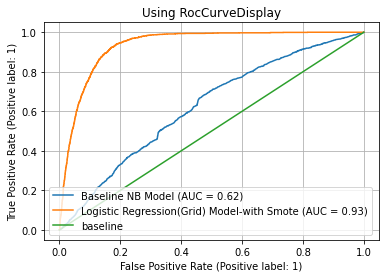

In [771]:
fig, ax = plt.subplots()
plot_roc_curve(Baseline_model, X_test, y_test,ax = ax, name = 'Baseline NB Model')
plot_roc_curve(Log_Grid_Smote, X_test1, y_test1,ax = ax, name = 'Logistic Regression(Grid) Model-with Smote')
plt.grid()
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
plt.title('Using RocCurveDisplay')
plt.legend();


In [ ]:
#PLot -2 : AUC using SKLPT to show the macro and micro AUC for different classes

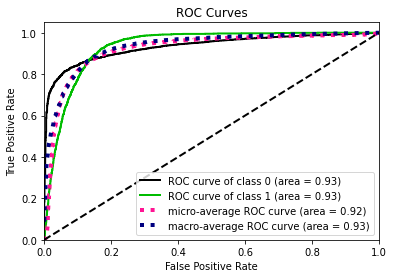

In [772]:
skplt.metrics.plot_roc_curve(y_test1, Log_Grid_Smote.predict_proba(X_test1))
plt.show()

In [ ]:
## Plot -3 Confusion Matrix- Test

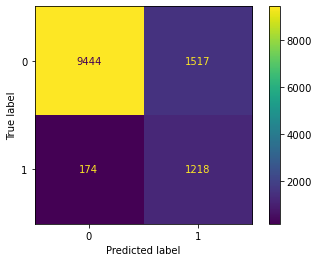

In [773]:
plot_confusion_matrix(Log_Grid_Smote,X_test1,y_test1);

In [ ]:
## Plot -4 Classification Report- Test

In [774]:
print(classification_report(y_test1,Log_Grid_Smote.predict(X_test1)))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92     10961
           1       0.45      0.88      0.59      1392

    accuracy                           0.86     12353
   macro avg       0.71      0.87      0.75     12353
weighted avg       0.92      0.86      0.88     12353



In [ ]:
## Plot -5 Lift curve- Test

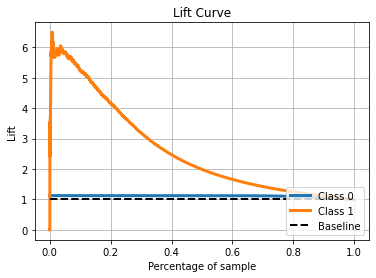

In [775]:
skplt.metrics.plot_lift_curve(y_test1,Log_Grid_Smote.predict_proba(X_test1));


In [ ]:
#Log_Grid.cv_results_

In [ ]:
'Log__C': 0.1, 'Log__penalty': 'l2', 'Log__solver': 'liblinear'

In [ ]:
# Creating a model from optimal Grid search parameters to find the coefficients

In [776]:
Log_pipe_optimal_smote= Pipeline([('preprocessor', preprocessor_GS),
                         ('Smote',SMOTE(random_state=12,sampling_strategy="minority")),\
                         ('Log',LogisticRegression(
                         C= 0.1,
 penalty='l1',                            
 solver= 'liblinear' ) )
                         ])

In [ ]:
# fiting the pipeline

In [777]:
Log_pipe_optimal_smote.fit(X_train1,y_train1)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'campaign',
                                                   'pdays', 'previous',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  ['age_bins_category',
                                                   'job_category',
                                                   'marital_category',
                                                   'education_category',
                                                   'default_category',
                                                   'housing_category',
                                                   'loan_category', 'contact',
                                                   'month_category',
                                                   'day_of_week_category',
                                                   'poutcome_category'])])),
                ('Smote', SMOTE(random_state=12, sampling_strategy='minority')),
                ('Log',
                 LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))])

In [680]:
## Getting coefficeints outs

In [778]:
feature_names =Log_pipe_optimal_smote[:-1].get_feature_names_out()

coefs = pd.DataFrame(
  Log_pipe_optimal_smote['Log'].coef_.T,
   columns=["Coefficients"],
    index=feature_names,
)

coefs

,Coefficients
num__duration,1.819267
num__campaign,-0.106192
num__pdays,-0.404773
num__previous,-0.061360
num__emp.var.rate,-2.177175
num__cons.price.idx,0.774785
num__cons.conf.idx,0.222497
num__euribor3m,0.828189
num__nr.employed,-0.140683
cat__age_bins_category_age_bin_Rest,-0.433273


In [682]:
# Plotting the coefficients by size

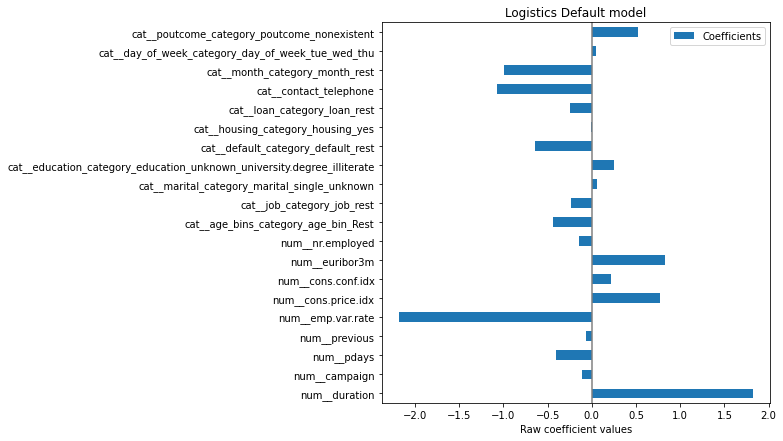

In [779]:
coefs.plot.barh(figsize=(9, 7))
plt.title("Logistics Default model")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

####  Checking the variability of the coefficients
#### If coefficients vary significantly when changing the input dataset their robustness 
#### is not guaranteed, and they should probably be interpreted with caution.

In [ ]:
## Permutation importance of features per Logistic Regression using smote model

In [780]:
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
cv_model_log = cross_validate(
   Log_pipe_optimal_smote,
    X_train1,
    y_train1,
    cv=cv,
    return_estimator=True,
    n_jobs=2,
)
coefs = pd.DataFrame(
    [est[-1].coef_[0] for est in cv_model_log["estimator"]],\
    columns=feature_names
)

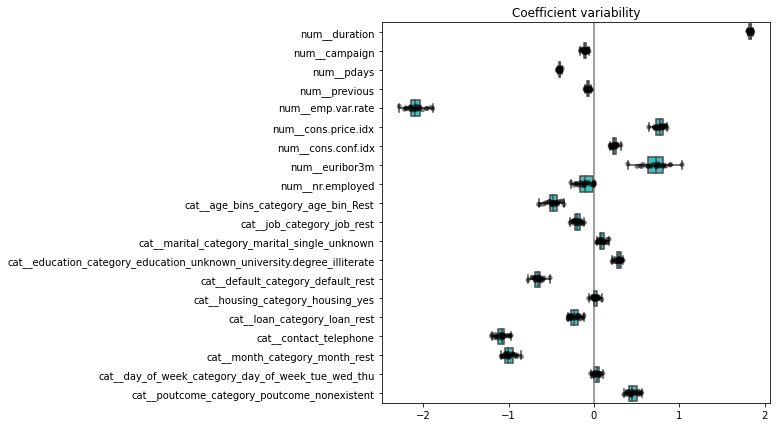

In [781]:
plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", color="k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5, whis=10)
plt.axvline(x=0, color=".5")
plt.title("Coefficient variability")
plt.subplots_adjust(left=0.3)

##  Data Frame for final summary

In [ ]:
# updating display setting for display

In [784]:
pd.options.display.max_colwidth = 300

In [795]:
res_dict_final = {'model': ['Baseline_NaiveBayes','Logistic_Regression-Default','KNN-default','DecisonTree_Default',\
                            'SVM_default','Logistic Regression-Multicollinearity','Logistic_Regression-GridSearch',\
                            'KNN-GridSearch','DecisonTree_GridSearch',\
                            'SVM_RandomizedSearch','Logistic_Regression-SMOTE'],
           'Train Time': [Baseline_model_train_time,Log_default_train_time,KNN_default_train_time,DT_default_train_time,\
                          SVM_default_train_time,Log_grid_train_time_mul,Log_grid_train_time,KNN_fit_time_grid,\
                          DT_fit_time_grid,\
                          SVM_fit_time_grid,Log_grid_Smote_train_time],
           'Train Accuracy (auc)': [Baseline_model_train_accuracy,Log_default_train_accuracy,\
                                    KNN_default_train_accuracy,DT_default_train_accuracy,
                                    SVM_default_train_accuracy,Log_Grid_train_accuracy_mul,Log_Grid_train_accuracy,\
                                    KNN_Grid_train_accuracy,DT_Grid_train_accuracy,SVM_Grid_train_accuracy,\
                                    Log_Grid_train_accuracy_smote],
           'Test Accuracy(auc) ': [Baseline_model_test_accuracy,Log_default_test_accuracy,\
                                   KNN_default_test_accuracy,DT_default_test_accuracy,\
                                   SVM_default_test_accuracy,Log_Grid_test_accuracy_mul,\
                                   Log_Grid_test_accuracy,\
                                   KNN_Grid_test_accuracy,DT_Grid_test_accuracy,\
                                   SVM_Grid_test_accuracy,Log_Grid_test_accuracy_smote],
             'Best Params ': ['Defaults','Defaults','Defaults','Defaults','Defaults',Log_Grid_bestParams_mul,\
                              Log_Grid_bestParams,\
                              KNN_Grid_bestParams,DT_Grid_bestParams,SVM_Grid_bestParams,Log_Grid_Smote_bestParams]

}
results_df_final = pd.DataFrame(res_dict_final).set_index('model')
#round off the values to nearest 2 decimal places for the results

results_df_final = results_df_final.round(decimals = 2)
results_df_final


,Train Time,Train Accuracy (auc),Test Accuracy(auc),Best Params
model,,,,
Baseline_NaiveBayes,0.06,0.63,0.62,Defaults
Logistic_Regression-Default,0.09,0.64,0.64,Defaults
KNN-default,0.11,0.66,0.57,Defaults
DecisonTree_Default,0.06,0.64,0.63,Defaults
SVM_default,125.26,0.56,0.54,Defaults
Logistic Regression-Multicollinearity,340.34,0.93,0.93,"{'Log__C': 1, 'Log__class_weight': {0: 0.08916666666666667, 1: 0.9108333333333334}, 'Log__penalty': 'l2', 'Log__solver': 'liblinear'}"
Logistic_Regression-GridSearch,733.68,0.93,0.93,"{'Log__C': 1, 'Log__class_weight': {0: 0.08916666666666667, 1: 0.9108333333333334}, 'Log__penalty': 'l2', 'Log__solver': 'liblinear'}"
KNN-GridSearch,3484.24,0.94,0.93,"{'KNN__leaf_size': 10, 'KNN__metric': 'euclidean', 'KNN__n_neighbors': 39, 'KNN__weights': 'uniform'}"
DecisonTree_GridSearch,1143.56,0.94,0.94,"{'DT__class_weight': {0: 4}, 'DT__criterion': 'entropy', 'DT__max_depth': 9, 'DT__min_samples_leaf': 1, 'DT__min_samples_split': 0.05}"


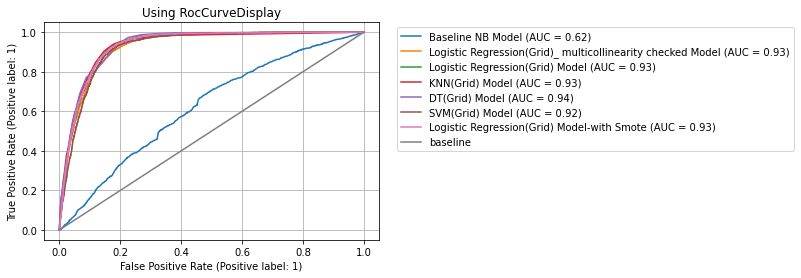

In [794]:
fig, ax = plt.subplots()
plot_roc_curve(Baseline_model, X_test, y_test,ax = ax, name = 'Baseline NB Model')
plot_roc_curve(Log_Grid_mul, X_trainmul,y_trainmul,ax = ax, name = 'Logistic Regression(Grid)_ multicollinearity checked Model')
plot_roc_curve(Log_Grid, X_test1, y_test1,ax = ax, name = 'Logistic Regression(Grid) Model')
plot_roc_curve(KNN_Grid, X_test1, y_test1,ax = ax, name = 'KNN(Grid) Model')
plot_roc_curve(DT_Grid, X_test1, y_test1,ax = ax, name = 'DT(Grid) Model')
plot_roc_curve(SVM_Grid, X_test1, y_test1,ax = ax, name = 'SVM(Grid) Model')
plot_roc_curve(Log_Grid_Smote, X_test1, y_test1,ax = ax, name = 'Logistic Regression(Grid) Model-with Smote')
plt.grid()
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
plt.title('Using RocCurveDisplay')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");

##### Questions